In [1]:
import pandas as pd
import numpy as np

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [17]:
print('-' * 80)
print('train_data')
train_data = import_data('train_data.csv')

print('-' * 80)
print('farm_data')
farm_data = import_data("farm_data.csv")

print('-' * 80)
print('train_weather')
train_weather = import_data('train_weather.csv')

print('-' * 80)
print('test_data')
test_data = import_data('test_data.csv')

print('-' * 80)
print('test_weather')
test_weather = import_data('test_weather.csv')

--------------------------------------------------------------------------------
train_data
Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.95 MB
Decreased by 71.8%
--------------------------------------------------------------------------------
farm_data
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.07 MB
Decreased by -2.6%
--------------------------------------------------------------------------------
train_weather
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.65 MB
Decreased by 72.4%
--------------------------------------------------------------------------------
test_data
Memory usage of dataframe is 636.26 MB
Memory usage after optimization is: 179.38 MB
Decreased by 71.8%
--------------------------------------------------------------------------------
test_weather
Memory usage of dataframe is 9.53 MB
Memory usage after optimization is: 2.63 MB
Decreased by 72.4%


In [18]:
submission_file = pd.read_csv("sample_submission.csv")

In [19]:
submission_file.shape

(1048575, 2)

In [20]:
submission_file.head()

,id,yield
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
print(train_data.shape)
print(farm_data.shape)
print(train_weather.shape)
print(test_data.shape)
print(test_weather.shape)

(20216100, 4)
(1449, 6)
(139773, 9)
(20848800, 4)
(138825, 9)


In [22]:
train_data.describe(include= 'all')

,date,farm_id,ingredient_type,yield
count,20216100,20216100,20216100,2.021610e+07
unique,8784,1434,4,NaN
top,2016-12-27 22:00:00,fid_63700,ing_w,NaN
freq,2370,51227,12060910,NaN
mean,NaN,NaN,NaN,1.988706e+03
std,NaN,NaN,NaN,1.532159e+05
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,1.830000e+01
50%,NaN,NaN,NaN,7.877500e+01
75%,NaN,NaN,NaN,2.679840e+02


In [23]:
farm_data.describe(include= 'all')

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
count,1449,675.0000,355.000000,1449.000000,1449,1449
unique,1434,NaN,NaN,NaN,16,16
top,fid_63700,NaN,NaN,NaN,Obery Farms,location 5290
freq,2,NaN,NaN,NaN,549,274
mean,NaN,inf,7.742188,8557.459961,NaN,NaN
std,NaN,31.0625,3.333984,10290.857422,NaN,NaN
min,NaN,1900.0000,5.000000,26.291550,NaN,NaN
25%,NaN,1949.0000,5.000000,2137.883789,NaN,NaN
50%,NaN,1970.0000,7.000000,5357.994629,NaN,NaN
75%,NaN,1995.0000,9.000000,10746.647461,NaN,NaN


In [24]:
train_weather.describe(include= 'all')

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139773,139773,139718.000000,70600.0,133505.0,139660.000000,129155.0,89484.0,139469.000000
unique,8784,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-12-31 23:00:00,location 7369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.000000,0.0,NaN,0.000000,NaN,NaN,0.000000
min,NaN,NaN,-28.906250,0.0,0.0,-35.000000,968.0,-1.0,0.000000
25%,NaN,NaN,7.199219,0.0,80.0,0.600098,1012.0,0.0,2.099609
50%,NaN,NaN,15.000000,2.0,190.0,8.296875,1016.5,0.0,3.099609
75%,NaN,NaN,22.203125,4.0,280.0,14.398438,1021.0,0.0,5.000000


In [25]:
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           "No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

# Converting the date, timestamp to datetime format

In [26]:
train_data['date'] = train_data['date'].astype("object")
train_weather['timestamp'] = train_weather['timestamp'].astype("object")
test_data['date'] = test_data['date'].astype("object")
test_weather['timestamp'] = test_weather['timestamp'].astype("object")

In [27]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'])
test_data['date'] = pd.to_datetime(test_data['date'])
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [28]:
train_weather.dtypes

timestamp                datetime64[ns]
deidentified_location          category
temp_obs                        float16
cloudiness                      float16
wind_direction                  float16
dew_temp                        float16
pressure_sea_level              float16
precipitation                   float16
wind_speed                      float16
dtype: object

In [30]:
train_data.groupby('farm_id')['date'].nunique().reset_index(name='counts').sort_values(by = ['counts'])


,farm_id,counts
405,fid_19864,479
406,fid_20058,1012
1116,fid_73322,1685
247,fid_118770,2327
963,fid_60652,2657
...,...,...
557,fid_30973,8784
558,fid_31213,8784
1048,fid_68361,8784
1064,fid_69323,8784


In [31]:
train_data.groupby('farm_id')['date'].nunique().reset_index(name='counts').sort_values(by = ['counts']).plot(kind = 'bar')

In [32]:
test_data.groupby('farm_id')['date'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,8760
1,fid_100107,8760
2,fid_100135,8760
3,fid_100249,8760
4,fid_100303,8760
...,...,...
1429,fid_99437,8760
1430,fid_99482,8760
1431,fid_99826,8760
1432,fid_99921,8760


In [33]:
train_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8782
1,location 2532,8783
2,location 4525,8614
3,location 5150,8454
4,location 5290,8780
5,location 5410,8777
6,location 5489,8783
7,location 565,8782
8,location 5677,8784
9,location 5833,8783


In [34]:
test_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8743
1,location 2532,8759
2,location 4525,8246
3,location 5150,8520
4,location 5290,8759
5,location 5410,8759
6,location 5489,8760
7,location 565,8757
8,location 5677,8760
9,location 5833,8759


In [35]:
train_data.groupby('farm_id')['ingredient_type'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,1
1,fid_100107,3
2,fid_100135,1
3,fid_100249,1
4,fid_100303,1
...,...,...
1429,fid_99437,1
1430,fid_99482,1
1431,fid_99826,1
1432,fid_99921,2


In [36]:
test_data.groupby('farm_id')['ingredient_type'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,1
1,fid_100107,3
2,fid_100135,1
3,fid_100249,1
4,fid_100303,1
...,...,...
1429,fid_99437,1
1430,fid_99482,1
1431,fid_99826,1
1432,fid_99921,2


In [37]:
len(train_data.loc[train_data['yield']==0,:])

1873976

In [38]:
test_data.sort_values(by = ['date']).tail()

,date,farm_id,ingredient_type,id
8188446,2017-12-31 23:00:00,fid_70340,ing_w,15584347
8188445,2017-12-31 23:00:00,fid_122564,ing_w,15584346
8188444,2017-12-31 23:00:00,fid_64922,ing_w,15584345
8188442,2017-12-31 23:00:00,fid_98025,ing_w,15584343
4213117,2017-12-31 23:00:00,fid_27893,ing_x,5880799


Checking duplicate present in the data
Checking duplicate present in the train_weather

In [39]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.000000,6.0,0.0,20.00000,1019.5,NaN,0.000000
1,2016-01-01 01:00:00,location 7369,24.406250,NaN,70.0,21.09375,1020.0,-1.0,1.500000
2,2016-01-01 02:00:00,location 7369,22.796875,2.0,0.0,21.09375,1020.0,0.0,0.000000
3,2016-01-01 03:00:00,location 7369,21.093750,2.0,0.0,20.59375,1020.0,0.0,0.000000
4,2016-01-01 04:00:00,location 7369,20.000000,2.0,250.0,20.00000,1020.0,-1.0,2.599609


In [40]:

duplicateRowsDF = train_weather[train_weather.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [41]:
duplicateRowsDF = train_weather[train_weather[['timestamp','deidentified_location']].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [42]:
#Checking duplicate present in the test_weather

duplicateRowsDF = test_weather[test_weather.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [43]:
duplicateRowsDF = test_weather[test_weather[['timestamp','deidentified_location']].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [44]:
#Checking duplicate present in the farm_data

duplicateRowsDF = farm_data[farm_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))


Duplicate Rows except first occurrence based on all columns are :
0


In [45]:
duplicateRowsDF = farm_data[farm_data['farm_id'].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
15


In [46]:
#Checking duplicate present in the train_data

duplicateRowsDF = train_data[train_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
117


In [47]:
train_data2 = train_data.drop("yield", axis=1)

In [48]:
duplicateRowsDF = train_data2[train_data2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
135568


In [49]:
#Checking duplicate present in the test_data

duplicateRowsDF = test_data[test_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [50]:
test_data2 = test_data.drop("id", axis=1)

In [51]:
duplicateRowsDF = test_data2[test_data2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
148920


In [ ]:
#Dropping the records where the whole rows are duplicated

In [52]:
train_data.drop_duplicates(inplace=True)

In [53]:
train_data.shape

(20215983, 4)

In [ ]:
#Dropping the records are duplicate except for yield, i.e mutiple similar records having different yields in train_data

In [54]:
train_data.columns

Index(['date', 'farm_id', 'ingredient_type', 'yield'], dtype='object')

In [55]:
train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type']).sum()

135451

In [56]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type']).head()

,date,farm_id,ingredient_type,yield
1483,2016-01-01,fid_122174,ing_w,69.516998
1598,2016-01-01,fid_122174,ing_w,39.519001
695,2016-01-01,fid_18990,ing_w,129.789993
747,2016-01-01,fid_18990,ing_w,354.412994
669,2016-01-01,fid_26064,ing_w,7.770000


In [57]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type']).tail()

,date,farm_id,ingredient_type,yield
20215484,2016-12-31 23:00:00,fid_73431,ing_w,107.867996
20214247,2016-12-31 23:00:00,fid_81333,ing_w,42.320000
20214568,2016-12-31 23:00:00,fid_81333,ing_w,391.625000
20214316,2016-12-31 23:00:00,fid_97094,ing_w,15.140000
20215920,2016-12-31 23:00:00,fid_97094,ing_w,2.400000


In [58]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date']).tail()

,date,farm_id,ingredient_type,yield
20213971,2016-12-31 23:00:00,fid_68761,ing_w,16.240000
20213812,2016-12-31 23:00:00,fid_40459,ing_w,301.828003
20215903,2016-12-31 23:00:00,fid_59158,ing_w,6.900000
20214568,2016-12-31 23:00:00,fid_81333,ing_w,391.625000
20215920,2016-12-31 23:00:00,fid_97094,ing_w,2.400000


In [ ]:
#Storing the dopped duplicates in another df before dropping them

In [59]:
dropped_dup_train = train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type'])

In [60]:
dropped_dup_train.shape

(270902, 4)

In [61]:
dropped_dup_train.head()

,date,farm_id,ingredient_type,yield
1483,2016-01-01,fid_122174,ing_w,69.516998
1598,2016-01-01,fid_122174,ing_w,39.519001
695,2016-01-01,fid_18990,ing_w,129.789993
747,2016-01-01,fid_18990,ing_w,354.412994
669,2016-01-01,fid_26064,ing_w,7.770000


In [ ]:
#dropping all duplicates in train_data first


In [62]:
train_data2 = train_data.copy()

In [63]:
train_data2.drop_duplicates(subset=['date', 'farm_id', 'ingredient_type'],keep=False).shape

(19945081, 4)

In [64]:
train_data2.drop_duplicates(subset=['date', 'farm_id', 'ingredient_type'],keep=False,inplace=True)

In [65]:
train_data2.shape

(19945081, 4)

In [ ]:
##Taking the avg of the yield value in the duplicated rows

# Often, it's better to mark bad rows in a dataframe instead of deleting them.

# This helps keep track of what modifications were done from the raw data until the processed dataframe.

In [66]:
#Taking the mean of the yield of the duplicated records in the dropped duplicated records of train_data firs

dropped_dup_traintempdf = pd.DataFrame(((dropped_dup_train['yield'] + dropped_dup_train['yield'].shift(-1)) / 2)[::2])

In [67]:
type(dropped_dup_traintempdf)

pandas.core.frame.DataFrame

In [68]:
dropped_dup_traintempdf[:5]

,yield
1483,54.517998
695,242.101501
669,545.335022
783,65.803757
64,1.550000


In [ ]:
#####################

In [69]:
dropped_dup_traintempdf_merge = pd.merge(dropped_dup_train, dropped_dup_traintempdf, left_index=True, right_index=True)

In [70]:
dropped_dup_traintempdf_merge.head()

,date,farm_id,ingredient_type,yield_x,yield_y
1483,2016-01-01,fid_122174,ing_w,69.516998,54.517998
695,2016-01-01,fid_18990,ing_w,129.789993,242.101501
669,2016-01-01,fid_26064,ing_w,7.770000,545.335022
783,2016-01-01,fid_29387,ing_w,0.162500,65.803757
64,2016-01-01,fid_40459,ing_w,0.000000,1.550000


In [71]:
dropped_dup_traintempdf_merge.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield_x            0
yield_y            0
dtype: int64

In [72]:
dropped_dup_traintempdf_merge.duplicated().sum()

0

In [73]:
dropped_dup_traintempdf_merge.drop("yield_x",axis = 1, inplace=True)

In [74]:
dropped_dup_traintempdf_merge.shape

(135451, 4)

In [75]:
dropped_dup_traintempdf_merge.rename({'yield_y': 'yield'}, axis=1, inplace = True)

In [76]:
dropped_dup_traintempdf_merge.tail(5)

,date,farm_id,ingredient_type,yield
20214297,2016-12-31 23:00:00,fid_68792,ing_w,303.235840
20214598,2016-12-31 23:00:00,fid_71910,ing_w,22.299999
20214206,2016-12-31 23:00:00,fid_73431,ing_w,65.319000
20214247,2016-12-31 23:00:00,fid_81333,ing_w,216.972504
20214316,2016-12-31 23:00:00,fid_97094,ing_w,8.770000


In [ ]:
#Now merging it back to the train_Data


In [77]:
train_data2_combined_02= pd.concat([train_data2, dropped_dup_traintempdf_merge])

In [78]:
train_data2_combined_02.shape

(20080532, 4)

In [79]:
train_data2_combined_02.tail()

,date,farm_id,ingredient_type,yield
20214297,2016-12-31 23:00:00,fid_68792,ing_w,303.235840
20214598,2016-12-31 23:00:00,fid_71910,ing_w,22.299999
20214206,2016-12-31 23:00:00,fid_73431,ing_w,65.319000
20214247,2016-12-31 23:00:00,fid_81333,ing_w,216.972504
20214316,2016-12-31 23:00:00,fid_97094,ing_w,8.770000


In [ ]:
#Removing duplicates farmid from farm_data

In [80]:
farm_data2  = farm_data.groupby('farm_id', group_keys=False).apply(lambda x: x.loc[x.farm_area.idxmax()])

In [81]:
farm_data2.reset_index(drop=True,inplace = True)

In [82]:
farm_data2.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_100053,NaN,NaN,2043.865967,Del Monte Foods,location 5290
1,fid_100107,NaN,NaN,35416.574219,Del Monte Foods,location 2532
2,fid_100135,NaN,NaN,1432.564209,Dole Food Company,location 5290
3,fid_100249,NaN,NaN,941.571899,Wayne Farms,location 5489
4,fid_100303,NaN,NaN,3716.120117,Wayne Farms,location 5290


In [83]:
farm_data2.shape


(1434, 6)

In [ ]:
#Checking for % of Null values in each column

In [84]:
# Checking for % of Null values in each column
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

In [85]:
missing(train_data2_combined_02)

yield              0.0
ingredient_type    0.0
farm_id            0.0
date               0.0
dtype: float64


In [86]:
missing(farm_data2)

num_processing_plants         75.59
operations_commencing_year    53.63
deidentified_location          0.00
farming_company                0.00
farm_area                      0.00
farm_id                        0.00
dtype: float64


In [87]:
missing(train_weather)

cloudiness               49.49
precipitation            35.98
pressure_sea_level        7.60
wind_direction            4.48
wind_speed                0.22
dew_temp                  0.08
temp_obs                  0.04
deidentified_location     0.00
timestamp                 0.00
dtype: float64


In [88]:
missing(test_data)

id                 0.0
ingredient_type    0.0
farm_id            0.0
date               0.0
dtype: float64


In [89]:
missing(test_weather)

cloudiness               49.75
precipitation            34.42
pressure_sea_level        7.84
wind_direction            4.42
wind_speed                0.17
dew_temp                  0.13
temp_obs                  0.03
deidentified_location     0.00
timestamp                 0.00
dtype: float64


In [ ]:
## Dropping the columns having >40% missing values

In [90]:
farm_data2.shape[0]*0.60

860.4

In [91]:
min_threshold_na_farm = farm_data2.shape[0]*0.60
farm_data2.dropna( thresh=min_threshold_na_farm, axis=1,inplace=True)

In [92]:
min_threshold_na_weather_train = train_weather.shape[0]*0.60
train_weather.dropna( thresh=min_threshold_na_weather_train, axis=1,inplace=True)

In [93]:
min_threshold_na_weather_test = test_weather.shape[0]*0.60
test_weather.dropna( thresh=min_threshold_na_weather_test, axis=1,inplace=True)

In [94]:
test_weather.columns

Index(['timestamp', 'deidentified_location', 'temp_obs', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed'],
      dtype='object')

In [ ]:
#Imputation of train and test weather using mean

In [95]:
test_weather['precipitation'].value_counts()

 0.0      78640
-1.0       5964
 3.0       1612
 5.0        852
 2.0        530
          ...  
 442.0        1
 99.0         1
 201.0        1
 140.0        1
 150.0        1
Name: precipitation, Length: 144, dtype: int64

In [96]:
col_to_imputed_weather = ['temp_obs', 'wind_direction','dew_temp', 'pressure_sea_level', 'wind_speed',"precipitation"]

In [97]:
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'])
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [98]:
train_weather['dayofyear'] = train_weather['timestamp'].dt.dayofyear
test_weather['dayofyear'] = test_weather['timestamp'].dt.dayofyear

In [99]:
train_weather[col_to_imputed_weather] = train_weather[col_to_imputed_weather].fillna(train_weather.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather].transform('mean'))

In [100]:
test_weather[col_to_imputed_weather] = test_weather[col_to_imputed_weather].fillna(test_weather.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather].transform('mean'))

In [101]:
train_weather.isnull().sum()


timestamp                    0
deidentified_location        0
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level        8892
precipitation            40567
wind_speed                   0
dayofyear                    0
dtype: int64

In [102]:
test_weather.isnull().sum()

timestamp                    0
deidentified_location        0
temp_obs                     0
wind_direction               0
dew_temp                     1
pressure_sea_level        8501
precipitation            36285
wind_speed                   0
dayofyear                    0
dtype: int64

In [103]:
train_weather.pressure_sea_level.value_counts().sort_values()

972.0        1
969.0        1
973.0        1
968.5        1
968.0        1
          ... 
1018.5    3854
1016.5    3925
1015.0    3925
1018.0    3948
1016.0    3991
Name: pressure_sea_level, Length: 133, dtype: int64

In [104]:
test_weather.pressure_sea_level.value_counts().sort_values()

976.5        1
972.0        1
1050.0       2
973.5        2
975.5        2
          ... 
1017.0    3890
1016.5    3974
1015.5    4003
1015.0    4019
1016.0    4037
Name: pressure_sea_level, Length: 130, dtype: int64

Since 0 is occuring majority of the times in precipitation; 
imputing the remaining NULL values of precipitation with mode
i.e 0 and pressure_sea_level with the mean as their values range are close,
so it makes more sense

In [105]:
train_weather['precipitation'].fillna(train_weather['precipitation'].mode(), inplace=True)

In [106]:
test_weather['precipitation'].fillna(test_weather['precipitation'].mode(), inplace=True)

In [107]:
train_weather.fillna(train_weather.mean(), inplace=True)

C:\Users\Vishnu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Vishnu\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [108]:
test_weather.fillna(test_weather.mean(), inplace=True)

In [109]:
train_weather.drop("dayofyear",axis =1,inplace =True)
test_weather.drop("dayofyear",axis =1,inplace =True)

In [ ]:
##Merging train_Data with farm_data
##Merging test_Data with farm_data

In [110]:
initial_merged_train = pd.merge(train_data2_combined_02, farm_data2,on = "farm_id")

In [111]:
initial_merged_train2 = initial_merged_train.drop('yield',axis = 1)

In [112]:
duplicateRowsDF = initial_merged_train2[initial_merged_train2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [113]:
initial_merged_test = pd.merge(test_data, farm_data2,on = "farm_id")

In [114]:
duplicateRowsDF = initial_merged_test[initial_merged_test.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [115]:
import pickle
initial_merged_train.to_pickle("initial_merged_train.pickle") 
initial_merged_test.to_pickle("initial_merged_test.pickle")


In [116]:
train_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8782
1,location 2532,8783
2,location 4525,8614
3,location 5150,8454
4,location 5290,8780
5,location 5410,8777
6,location 5489,8783
7,location 565,8782
8,location 5677,8784
9,location 5833,8783


In [117]:
initial_merged_train.groupby('deidentified_location')['date'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8775
1,location 2532,8784
2,location 4525,8784
3,location 5150,8783
4,location 5290,8784
5,location 5410,8784
6,location 5489,8784
7,location 565,8783
8,location 5677,8783
9,location 5833,8783


In [118]:
initial_merged_test.groupby('deidentified_location')['date'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8760
1,location 2532,8760
2,location 4525,8760
3,location 5150,8760
4,location 5290,8760
5,location 5410,8760
6,location 5489,8760
7,location 565,8760
8,location 5677,8760
9,location 5833,8760


In [119]:
initial_merged_test.dtypes

date                     datetime64[ns]
farm_id                          object
ingredient_type                category
id                                int32
farm_area                       float64
farming_company                  object
deidentified_location            object
dtype: object

In [120]:
initial_merged_test.shape

(20848800, 7)

In [121]:
initial_merged_test.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
id                       0
farm_area                0
farming_company          0
deidentified_location    0
dtype: int64

In [122]:
initial_merged_train.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
yield                    0
farm_area                0
farming_company          0
deidentified_location    0
dtype: int64

In [123]:
initial_merged_train.shape

(20080532, 7)

In [ ]:
#Final merged

In [124]:
final_train_merged = pd.merge(initial_merged_train,train_weather,how="left",left_on=["deidentified_location","date"],right_on=['deidentified_location','timestamp'])

In [125]:
final_test_merged=pd.merge(initial_merged_test,test_weather,how="left",left_on=["deidentified_location","date"],right_on=['deidentified_location','timestamp'])

In [126]:
final_train_merged.to_pickle("final_train_merged_dup_rem.pickle") 
final_test_merged.to_pickle("final_test_merged_dup_rem.pickle")

In [127]:
final_train_merged2= final_train_merged.copy()

In [128]:
final_train_merged2 = final_train_merged.drop("yield", axis=1)

In [129]:
duplicateRowsDF = final_train_merged2[final_train_merged2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [130]:
print(final_train_merged.shape)
print(final_test_merged.shape)

(20080532, 14)
(20848800, 14)


In [131]:
final_train_merged.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 00:00:00,25.000000,0.0,20.00000,1019.5,-0.17395,0.000000
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 01:00:00,24.406250,70.0,21.09375,1020.0,-1.00000,1.500000
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 02:00:00,22.796875,0.0,21.09375,1020.0,0.00000,0.000000
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 03:00:00,21.093750,0.0,20.59375,1020.0,0.00000,0.000000
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 04:00:00,20.000000,250.0,20.00000,1020.0,-1.00000,2.599609


In [132]:
final_train_merged['date'] = final_train_merged['date'].astype("object")
final_test_merged['date'] = final_test_merged['date'].astype("object")

In [133]:
final_train_merged['date'] = pd.to_datetime(final_train_merged['date'])
final_test_merged['date'] = pd.to_datetime(final_test_merged['date'])
# test_data['date'] = pd.to_datetime(test_data['date'])
# test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [134]:
final_train_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
yield                        0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                89921
temp_obs                 89921
wind_direction           89921
dew_temp                 89921
pressure_sea_level       89921
precipitation            89921
wind_speed               89921
dtype: int64

In [135]:
final_test_merged.isnull().sum()


date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                 96155
wind_direction           96155
dew_temp                 96155
pressure_sea_level       96155
precipitation            96155
wind_speed               96155
dtype: int64

In [136]:
final_test_merged.columns

Index(['date', 'farm_id', 'ingredient_type', 'id', 'farm_area',
       'farming_company', 'deidentified_location', 'timestamp', 'temp_obs',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [ ]:
## EDA 

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Distribution of the target variable

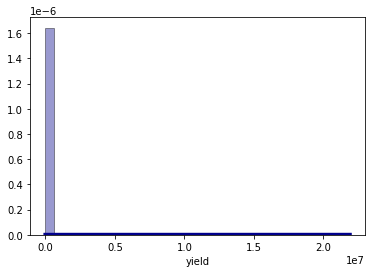

In [138]:
# Density Plot and Histogram of all arrival delays
sns.distplot(final_train_merged['yield'], hist=True, kde=True, 
bins=int(180/5), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})

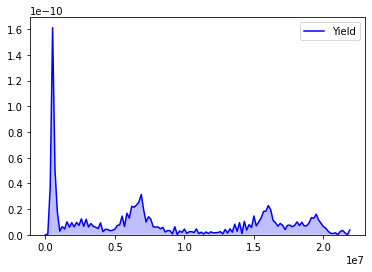

In [139]:
sns.kdeplot(final_train_merged["yield"], color='b', shade=True, Label='Yield')

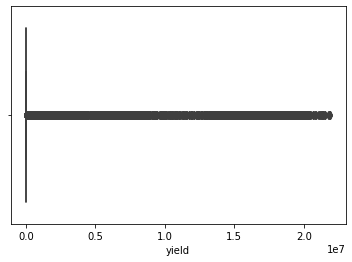

In [140]:
sns.boxplot("yield", data = final_train_merged)

In [141]:
final_train_merged['month'] = final_train_merged['date'].dt.month

In [ ]:
# Month wise how the yield is obtained for ingredient_type

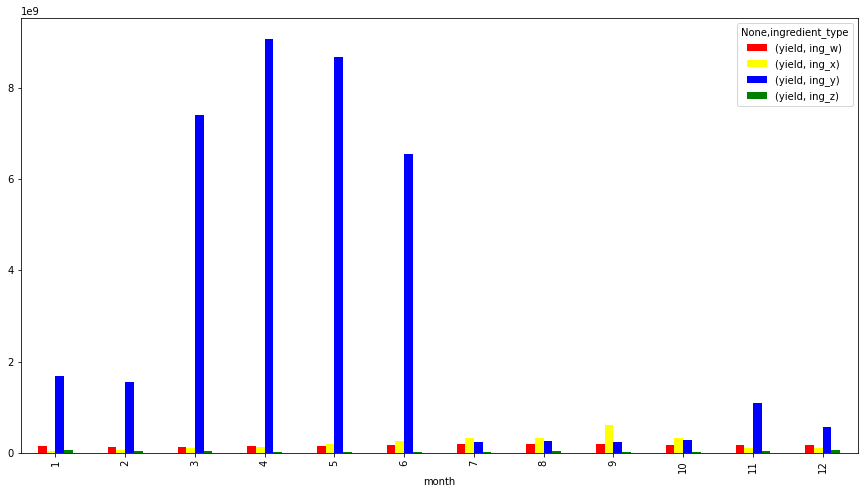

In [142]:
pd.DataFrame(final_train_merged.groupby(['month','ingredient_type'])['yield'].sum()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])

In [ ]:
# Line chart of the month-wise yield for each ingredient. Summer seems good for ing_y

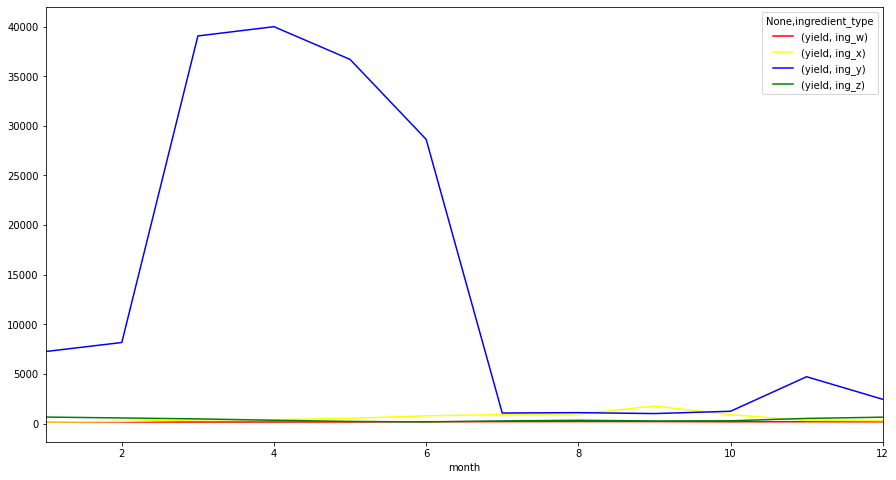

In [144]:
pd.DataFrame(final_train_merged.groupby(['month','ingredient_type'])['yield'].mean()).unstack().plot(kind = 'line',figsize=(15,8),color =['red','yellow','blue','green'])

In [ ]:
# Which farming company produces which ingredient_type and what was the yield in the year 2016

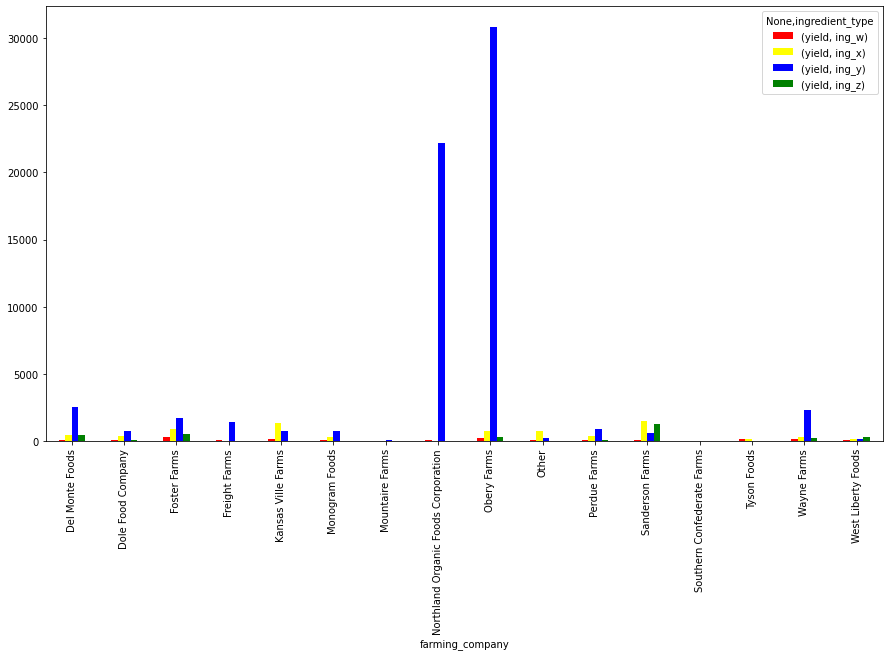

In [145]:
pd.DataFrame(final_train_merged.groupby(['farming_company','ingredient_type'])['yield'].mean()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])

In [ ]:
# Location-wise yield

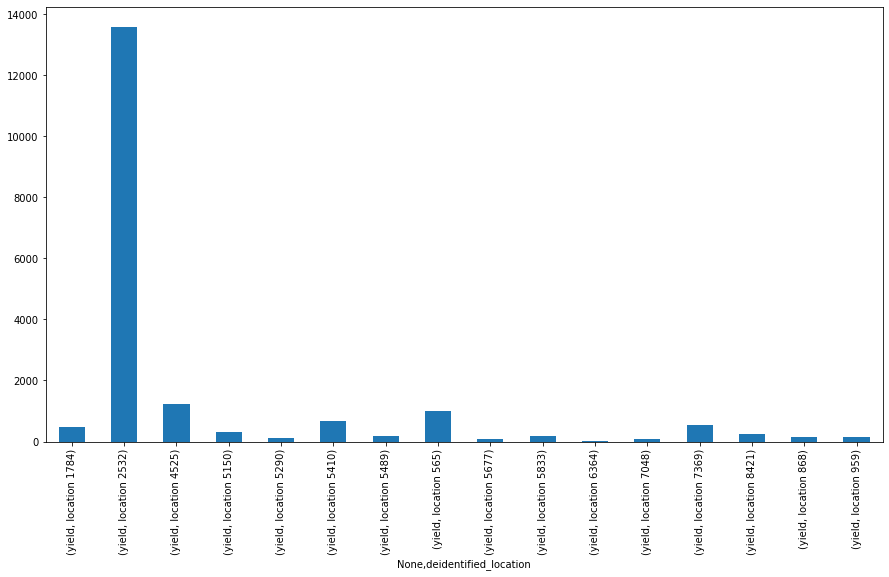

In [146]:
pd.DataFrame(final_train_merged.groupby(['deidentified_location'])['yield'].mean()).unstack().plot(kind = 'bar',figsize=(15,8))

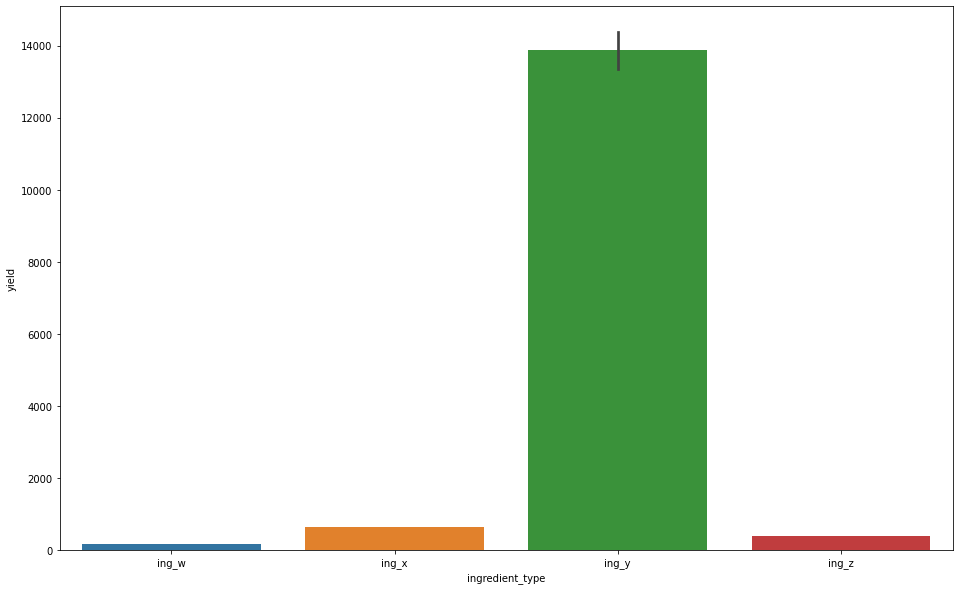

In [147]:
# ingredient_type VS yield **

plt.figure(figsize = (16, 10))
sns.barplot(y = "yield", x = "ingredient_type", data = final_train_merged)

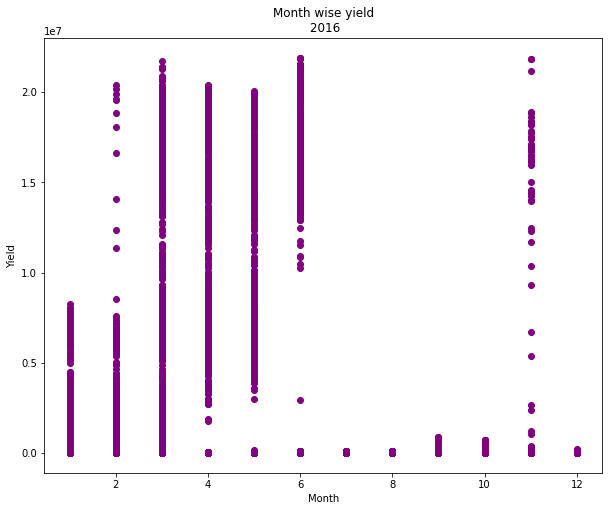

In [148]:
# Location-wise yield
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(final_train_merged['month'], 
final_train_merged["yield"], 
color = 'purple')
ax.set(xlabel='Month', ylabel='Yield',
title="Month wise yield\n 2016")
plt.show()

In [ ]:
#Location-wise farm area and ingredient

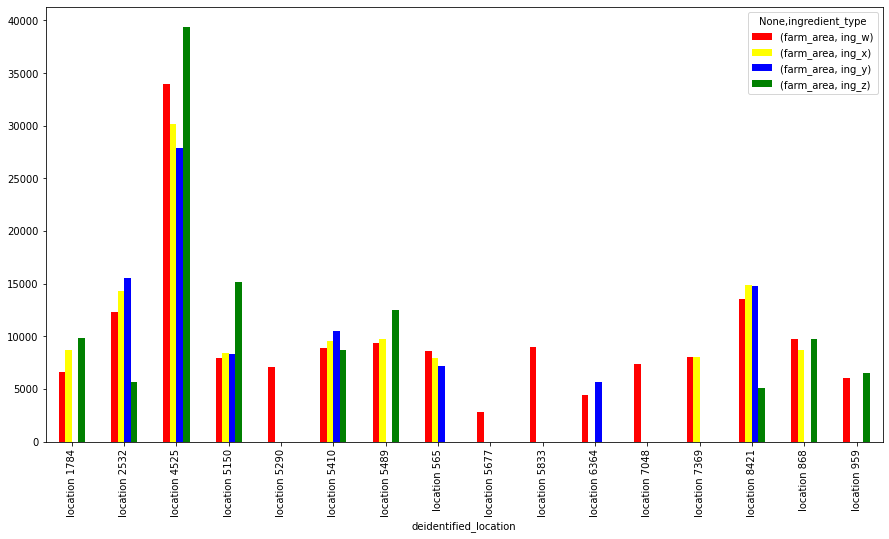

In [149]:
pd.DataFrame(final_train_merged.groupby(['deidentified_location','ingredient_type'])['farm_area'].mean()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])

In [ ]:
#Location-wise temperature observed for the year 2016

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

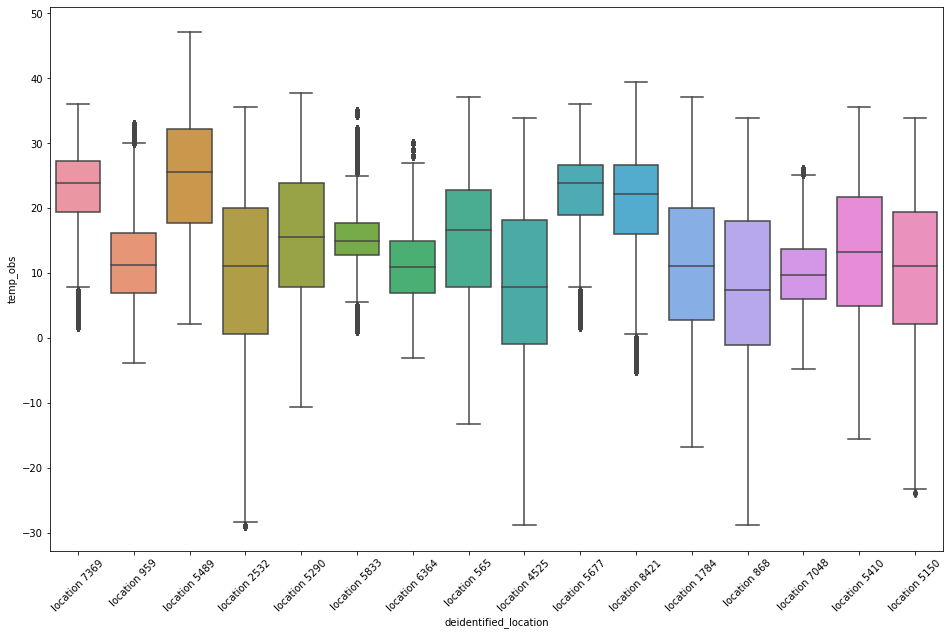

In [150]:
plt.figure(figsize = (16, 10))  

sns.boxplot(y = "temp_obs", x = "deidentified_location", data = final_train_merged)
plt.xticks(rotation = 45)

In [151]:
final_train_merged['weekday_name'] = final_train_merged['date'].dt.weekday_name

In [ ]:
# Week-wise yield

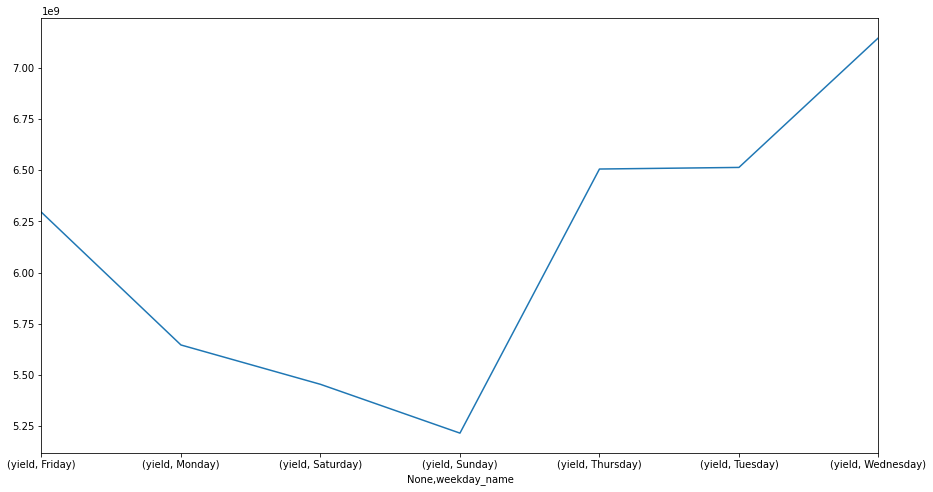

In [152]:
pd.DataFrame(final_train_merged.groupby(['weekday_name'])['yield'].sum()).unstack().plot(kind = 'line',figsize=(15,8))

In [ ]:
#Location-wise precipitation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

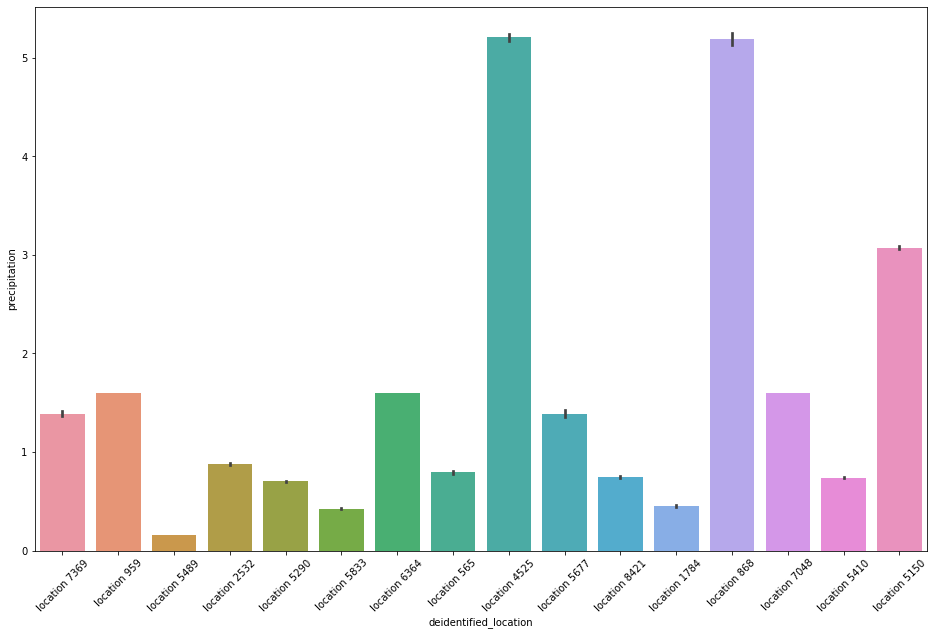

In [153]:
plt.figure(figsize = (16, 10))
sns.barplot(y = "precipitation", x = "deidentified_location", data = final_train_merged)
plt.xticks(rotation = 45)

In [154]:
final_train_merged.sample()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name
8918842,2016-06-14 04:00:00,fid_64345,ing_w,23.1667,919.182312,Sanderson Farms,location 5677,2016-06-14 04:00:00,27.796875,260.0,22.796875,1014.5,0.0,2.099609,6,Tuesday


In [155]:
final_train_merged['dayofyear'] = final_train_merged['date'].dt.dayofyear
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear

In [ ]:
#Distribution of the temperature observed over the year

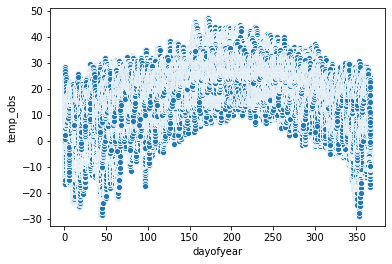

In [156]:
sns.scatterplot(x=final_train_merged['dayofyear'], y=final_train_merged['temp_obs']);


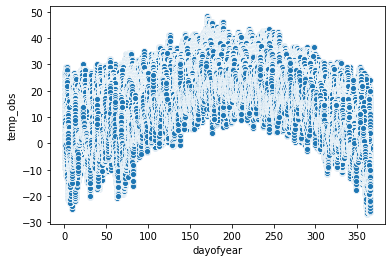

In [157]:
sns.scatterplot(x=final_test_merged['dayofyear'], y=final_test_merged['temp_obs']);

In [ ]:
#How Precipitaion effects each ingredient_type

Text(0, 0.5, 'yield')

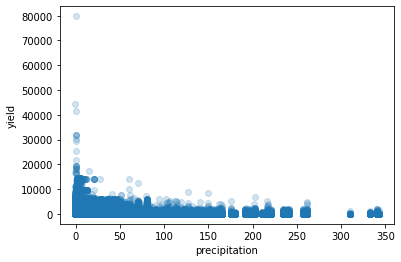

In [158]:
#testwithtarget[testwithtarget['ingredient_type']==0]
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_w"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_w"]["yield"], alpha=0.2)
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

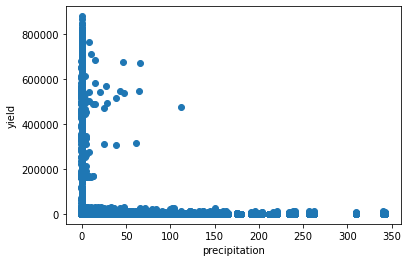

In [159]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_x"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_x"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

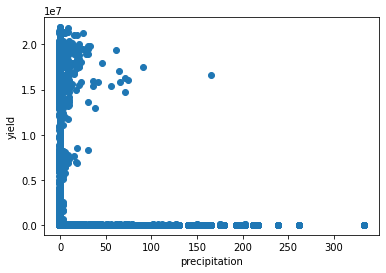

In [160]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_y"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_y"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

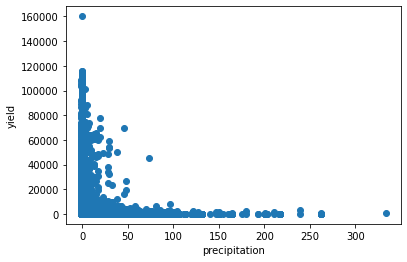

In [161]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_z"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_z"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

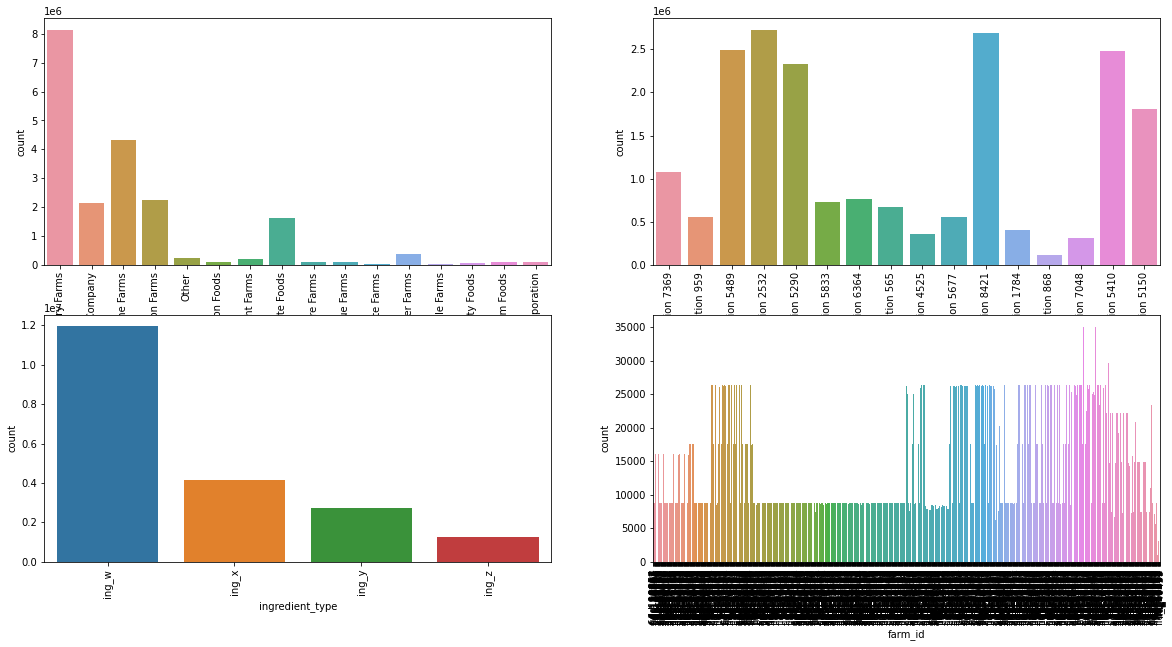

In [162]:
#Count plot

cat_cols= ["farming_company", 'deidentified_location' , 'ingredient_type', 'farm_id']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(final_train_merged[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
#HeatMap

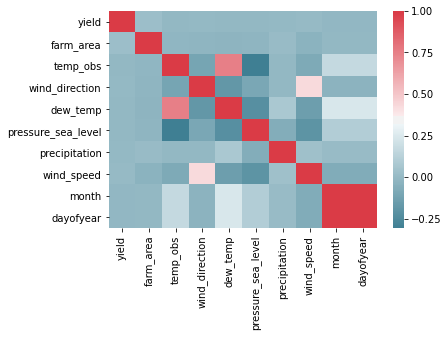

In [163]:
corr = final_train_merged.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
#Imputing the temp values in the final merged data of train, test

In [164]:
col_to_imputed_weather_again = ['temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level','wind_speed','precipitation']

In [165]:
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear
final_train_merged['dayofyear'] = final_train_merged['date'].dt.dayofyear

In [166]:
final_train_merged[col_to_imputed_weather_again] = final_train_merged[col_to_imputed_weather_again].fillna(final_train_merged.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather_again].transform('mean'))

In [167]:
final_test_merged[col_to_imputed_weather_again] = final_test_merged[col_to_imputed_weather_again].fillna(final_test_merged.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather_again].transform('mean'))

In [168]:
final_test_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                 14784
wind_direction           14784
dew_temp                 14784
pressure_sea_level       14784
precipitation            14784
wind_speed               14784
dayofyear                    0
dtype: int64

In [169]:
final_train_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
yield                        0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                89921
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level           0
precipitation                0
wind_speed                   0
month                        0
weekday_name                 0
dayofyear                    0
dtype: int64

In [170]:
final_train_merged.pressure_sea_level.value_counts().sort_values()

968.0          35
972.0          35
971.5          35
971.0          35
968.5          35
           ...   
1017.0     570469
1015.5     577088
1015.0     578948
1016.5     581674
1016.0    1440968
Name: pressure_sea_level, Length: 133, dtype: int64

In [171]:
final_test_merged[col_to_imputed_weather_again] = final_test_merged[col_to_imputed_weather_again].fillna(final_test_merged.groupby('deidentified_location')[col_to_imputed_weather_again].transform('mean'))

In [172]:
final_test_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level           0
precipitation                0
wind_speed                   0
dayofyear                    0
dtype: int64

In [173]:
final_train_merged.tail()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
20080527,2016-12-31 19:00:00,fid_40459,ing_w,161.440491,3459.800537,Dole Food Company,location 7369,2016-12-31 19:00:00,22.796875,140.0,10.000000,1021.5,0.0,5.699219,12,Saturday,366
20080528,2016-12-31 20:00:00,fid_40459,ing_w,161.940491,3459.800537,Dole Food Company,location 7369,2016-12-31 20:00:00,23.296875,170.0,8.898438,1021.0,0.0,4.101562,12,Saturday,366
20080529,2016-12-31 21:00:00,fid_40459,ing_w,158.569000,3459.800537,Dole Food Company,location 7369,2016-12-31 21:00:00,23.296875,150.0,10.000000,1021.0,0.0,4.101562,12,Saturday,366
20080530,2016-12-31 22:00:00,fid_40459,ing_w,156.371506,3459.800537,Dole Food Company,location 7369,2016-12-31 22:00:00,22.796875,160.0,10.000000,1021.0,0.0,3.099609,12,Saturday,366
20080531,2016-12-31 23:00:00,fid_40459,ing_w,153.863998,3459.800537,Dole Food Company,location 7369,2016-12-31 23:00:00,20.593750,0.0,10.000000,1021.0,0.0,0.000000,12,Saturday,366


In [ ]:
#final_test_merged.iloc[500:505,:]

In [ ]:
#Zeros in target variable and how the higher yield values are

In [174]:
len(final_train_merged.loc[final_train_merged['yield']==0,:])

1868038

In [175]:
len(final_train_merged.loc[final_train_merged['yield']>500,:])

3102412

In [176]:
final_train_merged.loc[final_train_merged['yield']>500,:].sort_values(by = 'yield').tail()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
13475365,2016-06-13 08:00:00,fid_72059,ing_y,21844500.0,30925.921875,Obery Farms,location 2532,2016-06-13 08:00:00,20.000000,140.0,17.203125,1013.0,8.0,3.599609,6,Monday,165
13482527,2016-11-09 14:00:00,fid_72059,ing_y,21847900.0,30925.921875,Obery Farms,location 2532,2016-11-09 14:00:00,3.900391,190.0,1.099609,1029.0,0.0,2.099609,11,Wednesday,314
13475221,2016-06-10 08:00:00,fid_72059,ing_y,21874500.0,30925.921875,Obery Farms,location 2532,2016-06-10 08:00:00,21.093750,140.0,17.796875,1007.0,0.0,6.199219,6,Friday,162
13475223,2016-06-10 09:00:00,fid_72059,ing_y,21889900.0,30925.921875,Obery Farms,location 2532,2016-06-10 09:00:00,21.093750,130.0,17.796875,1007.5,0.0,5.101562,6,Friday,162
13475367,2016-06-13 09:00:00,fid_72059,ing_y,21904700.0,30925.921875,Obery Farms,location 2532,2016-06-13 09:00:00,19.406250,50.0,17.203125,1014.5,0.0,6.199219,6,Monday,165


In [177]:
final_train_merged.loc[final_train_merged['yield']>500,:].sort_values(by = 'yield').sample(5)

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
12394851,2016-12-21 02:00:00,fid_83468,ing_z,1224.989990,17357.996094,Obery Farms,location 1784,2016-12-21 02:00:00,-1.700195,30.0,-6.101562,1027.0,0.0,1.500000,12,Wednesday,356
16062420,2016-01-14 20:00:00,fid_47796,ing_x,1864.800049,18040.648438,Foster Farms,location 5410,2016-01-14 20:00:00,5.601562,290.0,-6.101562,1012.0,0.0,3.599609,1,Thursday,14
19982500,2016-07-16 21:00:00,fid_24451,ing_x,3696.659912,23876.070312,Obery Farms,location 565,2016-07-16 21:00:00,27.203125,320.0,17.796875,1017.5,-1.0,5.699219,7,Saturday,198
14930275,2016-03-21 08:00:00,fid_71811,ing_y,1449.219971,12033.911133,Wayne Farms,location 2532,2016-03-21 08:00:00,-0.600098,0.0,-6.101562,1022.5,0.0,0.000000,3,Monday,81
10032124,2016-02-22 12:00:00,fid_100954,ing_w,520.000000,2783.466797,Obery Farms,location 8421,2016-02-22 12:00:00,16.093750,20.0,13.898438,1014.0,0.0,2.599609,2,Monday,53


In [178]:
final_train_merged.loc[final_train_merged['yield']>5000,:].sort_values(by = 'yield').head(5)

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
8825424,2016-01-16 04:00:00,fid_118135,ing_w,5000.009766,16999.949219,Obery Farms,location 4525,2016-01-16 04:00:00,-8.203125,80.0,-11.500000,1002.5,4.800781,6.199219,1,Saturday,16
8544884,2016-01-24 20:00:00,fid_80293,ing_y,5000.020020,30999.966797,Obery Farms,location 4525,2016-01-24 20:00:00,-6.699219,170.0,-12.000000,1016.5,1.599609,0.500000,1,Sunday,24
17082653,2016-10-16 03:00:00,fid_43164,ing_x,5000.020020,41103.816406,Obery Farms,location 5410,2016-10-16 03:00:00,10.601562,0.0,7.199219,1026.0,0.000000,0.000000,10,Sunday,290
17229929,2016-06-19 19:00:00,fid_33688,ing_x,5000.049805,18621.664062,Obery Farms,location 5410,2016-06-19 19:00:00,32.812500,132.5,11.101562,1023.0,0.000000,2.099609,6,Sunday,171
8589102,2016-01-26 09:00:00,fid_51401,ing_z,5000.080078,67999.882812,Obery Farms,location 4525,2016-01-26 09:00:00,-2.500000,70.0,-5.500000,1009.5,2.500000,3.599609,1,Tuesday,26


In [259]:
final_train_merged_without_outliers.describe()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,dayofyear
count,2.007642e+07,2.007642e+07,2.007642e+07,20076419.0,2.007642e+07,20076419.0,20076419.0,2.007642e+07,2.007642e+07,2.007642e+07
mean,4.257651e+02,1.006600e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.578225e+00,1.854719e+02
std,2.370551e+03,1.090411e+04,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,3.436818e+00,1.052679e+02
min,0.000000e+00,2.629155e+01,-2.890625e+01,0.0,-3.500000e+01,968.0,-1.0,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.840000e+01,3.066914e+03,8.296875e+00,80.0,0.000000e+00,1012.0,0.0,2.099609e+00,4.000000e+00,9.600000e+01
50%,7.917480e+01,6.786007e+03,1.670312e+01,170.0,8.898438e+00,1016.0,0.0,3.099609e+00,7.000000e+00,1.860000e+02
75%,2.685470e+02,1.301497e+04,2.390625e+01,270.0,1.609375e+01,1020.5,0.0,4.601562e+00,1.000000e+01,2.760000e+02
max,3.032690e+05,8.129012e+04,4.718750e+01,360.0,2.609375e+01,1046.0,343.0,1.900000e+01,1.200000e+01,3.660000e+02


In [180]:
final_train_merged.describe()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,dayofyear
count,2.008053e+07,2.008053e+07,2.008053e+07,20080532.0,2.008053e+07,20080532.0,20080532.0,2.008053e+07,2.008053e+07,2.008053e+07
mean,2.054184e+03,1.006940e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.577920e+00,1.854626e+02
std,1.537337e+05,1.090623e+04,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,3.436757e+00,1.052660e+02
min,0.000000e+00,2.629155e+01,-2.890625e+01,0.0,-3.500000e+01,968.0,-1.0,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.840900e+01,3.066914e+03,8.296875e+00,80.0,0.000000e+00,1012.0,0.0,2.099609e+00,4.000000e+00,9.600000e+01
50%,7.921790e+01,6.786007e+03,1.670312e+01,170.0,8.898438e+00,1016.0,0.0,3.099609e+00,7.000000e+00,1.860000e+02
75%,2.688330e+02,1.301497e+04,2.390625e+01,270.0,1.609375e+01,1020.5,0.0,4.601562e+00,1.000000e+01,2.760000e+02
max,2.190470e+07,8.129012e+04,4.718750e+01,360.0,2.609375e+01,1046.0,343.0,1.900000e+01,1.200000e+01,3.660000e+02


In [260]:
final_train_merged_without_outliers.describe(include='all')

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
count,20076419,20076419,20076419,2.007642e+07,2.007642e+07,20076419,20076419,19986499,2.007642e+07,20076419.0,2.007642e+07,20076419.0,20076419.0,2.007642e+07,2.007642e+07,20076419,2.007642e+07
unique,8784,1434,4,NaN,NaN,16,16,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
top,2016-12-27 22:00:00,fid_103446,ing_w,NaN,NaN,Obery Farms,location 2532,2016-12-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,NaN
freq,2354,35136,11939301,NaN,NaN,8124108,2717253,2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907024,NaN
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.257651e+02,1.006600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.578225e+00,NaN,1.854719e+02
std,NaN,NaN,NaN,2.370551e+03,1.090411e+04,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,3.436818e+00,NaN,1.052679e+02
min,NaN,NaN,NaN,0.000000e+00,2.629155e+01,NaN,NaN,NaN,-2.890625e+01,0.0,-3.500000e+01,968.0,-1.0,0.000000e+00,1.000000e+00,NaN,1.000000e+00
25%,NaN,NaN,NaN,1.840000e+01,3.066914e+03,NaN,NaN,NaN,8.296875e+00,80.0,0.000000e+00,1012.0,0.0,2.099609e+00,4.000000e+00,NaN,9.600000e+01


In [261]:
temptest = pd.concat([final_test_merged,weekend_or_not_test_df,time_of_day_test_df],axis=1)

In [262]:
temptest.describe(include='all')

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,...,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_test,time_of_day
count,20848800,20848800,20848800,2.084880e+07,2.084880e+07,20848800,20848800,20752645,2.084880e+07,20848800.0,...,2.084880e+07,20848800,2.084880e+07,2.084880e+07,2.084880e+07,20848800,20848800,2.084880e+07,2.084880e+07,20848800
unique,8760,1434,4,NaN,NaN,16,16,8760,NaN,NaN,...,NaN,7,NaN,NaN,NaN,2,2,NaN,NaN,4
top,2017-08-27 09:00:00,fid_63700,ing_w,NaN,NaN,Obery Farms,location 2532,2017-08-27 09:00:00,NaN,NaN,...,NaN,Sunday,NaN,NaN,NaN,False,False,NaN,NaN,Night
freq,2380,52560,12377880,NaN,NaN,8435880,2750640,2380,NaN,NaN,...,NaN,3027360,NaN,NaN,NaN,20163360,20163360,NaN,NaN,8687000
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 23:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.981995e+07,9.995600e+03,NaN,NaN,NaN,NaN,NaN,...,3.008219e+00,NaN,1.572055e+01,6.526027e+00,2.509589e+00,NaN,NaN,1.150000e+01,2.876712e-01,NaN
std,NaN,NaN,NaN,1.187348e+07,1.081608e+04,NaN,NaN,NaN,0.000000e+00,NaN,...,2.003405e+00,NaN,8.796247e+00,3.447851e+00,1.116767e+00,NaN,NaN,6.922187e+00,4.526770e-01,NaN
min,NaN,NaN,NaN,0.000000e+00,2.629155e+01,NaN,NaN,NaN,-2.679688e+01,0.0,...,0.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,9.411522e+06,3.066914e+03,NaN,NaN,NaN,8.500000e+00,80.0,...,1.000000e+00,NaN,8.000000e+00,4.000000e+00,2.000000e+00,NaN,NaN,5.750000e+00,0.000000e+00,NaN


In [182]:
import pickle
final_train_merged.to_pickle("final_train_merged_dup_rem_b4_tts2.pickle") 
final_test_merged.to_pickle("final_test_merged_final_dup_rem_b4_tts2.pickle")

In [34]:
import pandas as pd
final_train_merged = pd.read_pickle("final_train_merged_dup_rem_b4_tts2.pickle")
final_test_merged = pd.read_pickle("final_test_merged_final_dup_rem_b4_tts2.pickle")

In [184]:
final_train_merged.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,weekday_name,dayofyear
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 00:00:00,25.000000,0.0,20.00000,1019.5,-0.17395,0.000000,1,Friday,1
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 01:00:00,24.406250,70.0,21.09375,1020.0,-1.00000,1.500000,1,Friday,1
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 02:00:00,22.796875,0.0,21.09375,1020.0,0.00000,0.000000,1,Friday,1
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 03:00:00,21.093750,0.0,20.59375,1020.0,0.00000,0.000000,1,Friday,1
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 04:00:00,20.000000,250.0,20.00000,1020.0,-1.00000,2.599609,1,Friday,1


In [ ]:
#Removing outliers

In [185]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(final_train_merged["yield"]))
print(z)

[0.01385537 0.01385537 0.01385537 ... 0.01282404 0.01283833 0.01285464]


In [186]:
threshold = 1.96
#print(np.where(z >1.96 ))

In [187]:
final_train_merged_zscores = list(np.where(z > 1.96))

In [188]:
final_train_merged_zscores2 = list(np.where(z < 1.96))

In [189]:
len(final_train_merged_zscores[0])

4113

In [190]:
len(final_train_merged_zscores2[0])

20076419

In [191]:
final_train_merged_without_outliers = final_train_merged[(z < 1.96)]

In [192]:
final_train_merged_without_outliers.shape

(20076419, 17)

# Train validation Split

In [193]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
x = final_train_merged_without_outliers.copy().drop('yield',axis=1)

In [196]:
x.shape

(20076419, 16)

In [197]:
y = final_train_merged_without_outliers['yield']

In [198]:
y.shape

(20076419,)

In [199]:
trainx, validationx, trainy, validationy = train_test_split(x,y,test_size= 0.25,random_state=24)

In [200]:
print(trainx.shape)
print(trainy.shape)
print(validationx.shape)
print(validationy.shape)

(15057314, 16)
(15057314,)
(5019105, 16)
(5019105,)


In [201]:
trainx['farm_id'].isnull().sum()

0

# Extracting features from date and time

In [202]:
trainx['weekday'] = trainx['date'].dt.weekday
trainx['day_name'] = trainx['date'].dt.weekday_name
trainx['dayofyear'] = trainx['date'].dt.dayofyear
#trainx['weekofyear'] = trainx['date'].dt.weekofyear
trainx['day'] = trainx['date'].dt.day
trainx['month'] = trainx['date'].dt.month
trainx['quarter'] = trainx['date'].dt.quarter
trainx['is_month_end'] = trainx['date'].dt.is_month_end
trainx['is_month_start'] = trainx['date'].dt.is_month_start
# trainx['is_quarter_end'] = trainx['date'].dt.is_quarter_end
# trainx['is_quarter_start'] = trainx['date'].dt.is_quarter_start
trainx['hour'] = trainx['date'].dt.hour

In [203]:
validationx['weekday'] = validationx['date'].dt.weekday
validationx['day_name'] = validationx['date'].dt.weekday_name
validationx['dayofyear'] = validationx['date'].dt.dayofyear
#validationx['weekofyear'] = validationx['date'].dt.weekofyear
validationx['day'] = validationx['date'].dt.day
validationx['month'] = validationx['date'].dt.month
validationx['quarter'] = validationx['date'].dt.quarter
validationx['is_month_end'] = validationx['date'].dt.is_month_end
validationx['is_month_start'] = validationx['date'].dt.is_month_start
# validationx['is_quarter_end'] = validationx['date'].dt.is_quarter_end
# validationx['is_quarter_start'] = validationx['date'].dt.is_quarter_start
validationx['hour'] = validationx['date'].dt.hour

In [204]:
final_test_merged['weekday'] = final_test_merged['date'].dt.weekday
final_test_merged['day_name'] = final_test_merged['date'].dt.weekday_name
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear
#final_test_merged['weekofyear'] = final_test_merged['date'].dt.weekofyear
final_test_merged['day'] = final_test_merged['date'].dt.day
final_test_merged['month'] = final_test_merged['date'].dt.month
final_test_merged['quarter'] = final_test_merged['date'].dt.quarter
final_test_merged['is_month_end'] = final_test_merged['date'].dt.is_month_end
final_test_merged['is_month_start'] = final_test_merged['date'].dt.is_month_start
# final_test_merged['is_quarter_end'] = final_test_merged['date'].dt.is_quarter_end
# final_test_merged['is_quarter_start'] = final_test_merged['date'].dt.is_quarter_start
final_test_merged['hour'] = final_test_merged['date'].dt.hour

In [205]:
trainx.head()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,...,month,weekday_name,dayofyear,weekday,day_name,day,quarter,is_month_end,is_month_start,hour
10453036,2016-01-21 16:00:00,fid_14114,ing_y,13675.786133,Obery Farms,location 8421,2016-01-21 16:00:00,16.703125,158.5,12.796875,...,1,Thursday,21,3,Thursday,21,1,False,False,16
16660246,2016-04-27 02:00:00,fid_46229,ing_x,3066.913818,Obery Farms,location 5410,2016-04-27 02:00:00,11.703125,100.0,10.000000,...,4,Wednesday,118,2,Wednesday,27,2,False,False,2
16450558,2016-02-17 05:00:00,fid_80706,ing_w,2201.986816,Wayne Farms,location 5410,2016-02-17 05:00:00,2.800781,290.0,-2.199219,...,2,Wednesday,48,2,Wednesday,17,1,False,False,5
5124301,2016-01-12 10:00:00,fid_17291,ing_w,10219.330078,Obery Farms,location 5290,2016-01-12 10:00:00,-0.600098,170.0,-9.398438,...,1,Tuesday,12,1,Tuesday,12,1,False,False,10
7451410,2016-09-17 21:00:00,fid_45384,ing_w,1294.974976,Obery Farms,location 6364,2016-09-17 21:00:00,15.000000,360.0,12.000000,...,9,Saturday,261,5,Saturday,17,3,False,False,21


In [206]:
final_test_merged.sample(5)

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,...,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
12742268,2017-04-20 01:00:00,fid_51334,ing_w,25143182,416.391235,Other,location 1784,2017-04-20 01:00:00,13.296875,300.0,...,2.099609,110,3,Thursday,20,4,2,False,False,1
7494440,2017-07-13 09:00:00,fid_90885,ing_w,13634428,4079.370850,Obery Farms,location 5833,2017-07-13 09:00:00,14.398438,330.0,...,3.099609,194,3,Thursday,13,7,3,False,False,9
2634602,2017-11-17 01:00:00,fid_63965,ing_w,5569075,5582.169434,Dole Food Company,location 5489,2017-11-17 01:00:00,26.703125,220.0,...,1.500000,321,4,Friday,17,11,4,False,False,1
10396523,2017-12-10 01:00:00,fid_58087,ing_y,22180800,9434.764648,Obery Farms,location 8421,2017-12-10 01:00:00,13.898438,350.0,...,1.500000,344,6,Sunday,10,12,4,False,False,1
13364217,2017-08-06 13:00:00,fid_90098,ing_w,26306125,25604.996094,Obery Farms,location 7048,2017-08-06 13:00:00,14.398438,240.0,...,8.000000,218,6,Sunday,6,8,3,False,False,13


In [207]:
trainx.tail()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,...,month,weekday_name,dayofyear,weekday,day_name,day,quarter,is_month_end,is_month_start,hour
18335988,2016-07-28 14:00:00,fid_29039,ing_w,1704.026855,Obery Farms,location 5150,2016-07-28 14:00:00,25.593750,180.0,17.203125,...,7,Thursday,210,3,Thursday,28,3,False,False,14
5184719,2016-12-31 10:00:00,fid_109740,ing_w,8000.806152,Sanderson Farms,location 5290,2016-12-31 10:00:00,-1.099609,210.0,-7.199219,...,12,Saturday,366,5,Saturday,31,4,True,False,10
7221371,2016-07-10 22:00:00,fid_116054,ing_w,1716.011353,Foster Farms,location 6364,2016-07-10 22:00:00,16.000000,250.0,13.000000,...,7,Sunday,192,6,Sunday,10,3,False,False,22
5657729,2016-10-13 05:00:00,fid_115088,ing_w,4274.188477,Del Monte Foods,location 5290,2016-10-13 05:00:00,13.898438,220.0,12.796875,...,10,Thursday,287,3,Thursday,13,4,False,False,5
18041041,2016-03-11 09:00:00,fid_26870,ing_z,7867.769043,Sanderson Farms,location 5410,2016-03-11 09:00:00,15.000000,10.0,10.000000,...,3,Friday,71,4,Friday,11,1,False,False,9


In [ ]:
#Weekend or not

In [208]:
weekend_or_not_train= []
for i in trainx["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_train.append(1)
  else:
      weekend_or_not_train.append(0)

In [209]:
weekend_or_not_validation= []
for i in validationx["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_validation.append(1)
  else:
      weekend_or_not_validation.append(0)

In [210]:
weekend_or_not_test= []
for i in final_test_merged["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_test.append(1)
  else:
      weekend_or_not_test.append(0)

In [211]:
weekend_or_not_train_df = pd.DataFrame(weekend_or_not_train,columns= ['weekend_or_not_train'])
weekend_or_not_validation_df = pd.DataFrame(weekend_or_not_validation,columns= ['weekend_or_not_validation'])
weekend_or_not_test_df = pd.DataFrame(weekend_or_not_test,columns= ['weekend_or_not_test'])

In [212]:
trainx.head()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,...,month,weekday_name,dayofyear,weekday,day_name,day,quarter,is_month_end,is_month_start,hour
10453036,2016-01-21 16:00:00,fid_14114,ing_y,13675.786133,Obery Farms,location 8421,2016-01-21 16:00:00,16.703125,158.5,12.796875,...,1,Thursday,21,3,Thursday,21,1,False,False,16
16660246,2016-04-27 02:00:00,fid_46229,ing_x,3066.913818,Obery Farms,location 5410,2016-04-27 02:00:00,11.703125,100.0,10.000000,...,4,Wednesday,118,2,Wednesday,27,2,False,False,2
16450558,2016-02-17 05:00:00,fid_80706,ing_w,2201.986816,Wayne Farms,location 5410,2016-02-17 05:00:00,2.800781,290.0,-2.199219,...,2,Wednesday,48,2,Wednesday,17,1,False,False,5
5124301,2016-01-12 10:00:00,fid_17291,ing_w,10219.330078,Obery Farms,location 5290,2016-01-12 10:00:00,-0.600098,170.0,-9.398438,...,1,Tuesday,12,1,Tuesday,12,1,False,False,10
7451410,2016-09-17 21:00:00,fid_45384,ing_w,1294.974976,Obery Farms,location 6364,2016-09-17 21:00:00,15.000000,360.0,12.000000,...,9,Saturday,261,5,Saturday,17,3,False,False,21


In [213]:
weekend_or_not_train_df.head()

,weekend_or_not_train
0,0
1,0
2,0
3,0
4,1


In [214]:
weekend_or_not_train_df.tail()

,weekend_or_not_train
15057309,0
15057310,1
15057311,1
15057312,0
15057313,0


In [215]:
trainx.tail()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,...,month,weekday_name,dayofyear,weekday,day_name,day,quarter,is_month_end,is_month_start,hour
18335988,2016-07-28 14:00:00,fid_29039,ing_w,1704.026855,Obery Farms,location 5150,2016-07-28 14:00:00,25.593750,180.0,17.203125,...,7,Thursday,210,3,Thursday,28,3,False,False,14
5184719,2016-12-31 10:00:00,fid_109740,ing_w,8000.806152,Sanderson Farms,location 5290,2016-12-31 10:00:00,-1.099609,210.0,-7.199219,...,12,Saturday,366,5,Saturday,31,4,True,False,10
7221371,2016-07-10 22:00:00,fid_116054,ing_w,1716.011353,Foster Farms,location 6364,2016-07-10 22:00:00,16.000000,250.0,13.000000,...,7,Sunday,192,6,Sunday,10,3,False,False,22
5657729,2016-10-13 05:00:00,fid_115088,ing_w,4274.188477,Del Monte Foods,location 5290,2016-10-13 05:00:00,13.898438,220.0,12.796875,...,10,Thursday,287,3,Thursday,13,4,False,False,5
18041041,2016-03-11 09:00:00,fid_26870,ing_z,7867.769043,Sanderson Farms,location 5410,2016-03-11 09:00:00,15.000000,10.0,10.000000,...,3,Friday,71,4,Friday,11,1,False,False,9


In [ ]:
#Morning Evening night

In [216]:
time_of_day_train= []
for i in trainx["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_train.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_train.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_train.append("Evening")
  else:
      time_of_day_train.append('Night')

In [217]:
time_of_day_val= []
for i in validationx["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_val.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_val.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_val.append("Evening")
  else:
      time_of_day_val.append('Night')

In [218]:
time_of_day_test= []
for i in final_test_merged["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_test.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_test.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_test.append("Evening")
  else:
      time_of_day_test.append('Night')

In [219]:
time_of_day_train_df = pd.DataFrame(time_of_day_train,columns= ['time_of_day'])
time_of_day_val_df = pd.DataFrame(time_of_day_val,columns= ['time_of_day'])
time_of_day_test_df = pd.DataFrame(time_of_day_test,columns= ['time_of_day'])

In [220]:
final_test_merged.head()

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,...,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
0,2017-01-01 00:00:00,fid_110884,ing_w,0,690.455078,Obery Farms,location 7369,2017-01-01 00:00:00,17.796875,100.0,...,3.599609,1,6,Sunday,1,1,1,False,True,0
1,2017-01-01 01:00:00,fid_110884,ing_w,129,690.455078,Obery Farms,location 7369,2017-01-01 01:00:00,17.796875,130.0,...,3.099609,1,6,Sunday,1,1,1,False,True,1
2,2017-01-01 02:00:00,fid_110884,ing_w,258,690.455078,Obery Farms,location 7369,2017-01-01 02:00:00,16.093750,140.0,...,3.099609,1,6,Sunday,1,1,1,False,True,2
3,2017-01-01 03:00:00,fid_110884,ing_w,387,690.455078,Obery Farms,location 7369,2017-01-01 03:00:00,17.203125,140.0,...,3.099609,1,6,Sunday,1,1,1,False,True,3
4,2017-01-01 04:00:00,fid_110884,ing_w,516,690.455078,Obery Farms,location 7369,2017-01-01 04:00:00,16.703125,130.0,...,2.599609,1,6,Sunday,1,1,1,False,True,4


In [221]:
temptrain = pd.concat([trainx,weekend_or_not_train_df,time_of_day_train_df],axis=1)

In [222]:
tempval = pd.concat([validationx,weekend_or_not_validation_df,time_of_day_val_df],axis=1)

In [223]:
temptest = pd.concat([final_test_merged,weekend_or_not_test_df,time_of_day_test_df],axis=1)

In [224]:
temptest.shape

(20848800, 25)

In [225]:
temptrain['farm_id'].isnull().sum()

3766151

In [ ]:
#Dropping unneceassary columns

In [226]:
temptrain.head(5)

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,...,dayofyear,weekday,day_name,day,quarter,is_month_end,is_month_start,hour,weekend_or_not_train,time_of_day
0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Afternoon
1,2016-01-01 01:00:00,fid_110884,ing_w,690.455078,Obery Farms,location 7369,2016-01-01 01:00:00,24.406250,70.0,21.09375,...,1.0,4.0,Friday,1.0,1.0,False,True,1.0,0.0,Night
2,2016-01-01 02:00:00,fid_110884,ing_w,690.455078,Obery Farms,location 7369,2016-01-01 02:00:00,22.796875,0.0,21.09375,...,1.0,4.0,Friday,1.0,1.0,False,True,2.0,0.0,Night
3,2016-01-01 03:00:00,fid_110884,ing_w,690.455078,Obery Farms,location 7369,2016-01-01 03:00:00,21.093750,0.0,20.59375,...,1.0,4.0,Friday,1.0,1.0,False,True,3.0,0.0,Morning
4,2016-01-01 04:00:00,fid_110884,ing_w,690.455078,Obery Farms,location 7369,2016-01-01 04:00:00,20.000000,250.0,20.00000,...,1.0,4.0,Friday,1.0,1.0,False,True,4.0,1.0,Night


In [227]:
#,'Unnamed: 0','Unnamed: 0.1
temptrain.drop(['date','timestamp','weekday'],axis=1, inplace = True)
tempval.drop(['date','timestamp','weekday'],axis=1, inplace = True)
temptest.drop(['date','timestamp','weekday'],axis=1, inplace = True)

In [228]:
temptest2 = temptest.copy().drop('id',axis=1)

In [229]:
temptest2.shape

(20848800, 21)

In [230]:
id_col = temptest['id']

In [231]:
id_col.shape

(20848800,)

In [232]:
tempval.dtypes

farm_id                        object
ingredient_type              category
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float16
wind_direction                float16
dew_temp                      float16
pressure_sea_level            float16
precipitation                 float16
wind_speed                    float16
month                         float64
weekday_name                   object
dayofyear                     float64
day_name                       object
day                           float64
quarter                       float64
is_month_end                   object
is_month_start                 object
hour                          float64
weekend_or_not_validation     float64
time_of_day                    object
dtype: object

In [233]:
cat_cols = ['farm_id', 'ingredient_type', 'farming_company','deidentified_location','day_name','dayofyear','day','month','quarter','hour','time_of_day']

In [234]:
temptrain[cat_cols] = temptrain[cat_cols].astype("category")

In [235]:
tempval[cat_cols] = tempval[cat_cols].astype("category")

In [236]:
temptest2[cat_cols] = temptest2[cat_cols].astype("category")

In [ ]:
# Label Encoding

In [237]:
#label encoding the categorical columns
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder1 = preprocessing.LabelEncoder() 
label_encoder2 = preprocessing.LabelEncoder() 
label_encoder3 = preprocessing.LabelEncoder() 
label_encoder4 = preprocessing.LabelEncoder() 
label_encoder5 = preprocessing.LabelEncoder() 
label_encoder6 = preprocessing.LabelEncoder() 


In [238]:
temptrain.isnull().sum()

farm_id                  3766151
ingredient_type          3766151
farm_area                3766151
farming_company          3766151
deidentified_location    3766151
temp_obs                 3766151
wind_direction           3766151
dew_temp                 3766151
pressure_sea_level       3766151
precipitation            3766151
wind_speed               3766151
month                    3766151
weekday_name             3766151
dayofyear                3766151
day_name                 3766151
day                      3766151
quarter                  3766151
is_month_end             3766151
is_month_start           3766151
hour                     3766151
weekend_or_not_train     3766151
time_of_day              3766151
dtype: int64

In [239]:
le = label_encoder6
temptrain = temptrain.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
tempval = tempval.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
temptest2 = temptest2.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [240]:
# Encode labels in column target. 
label_encoder1.fit(temptrain["farm_id"])
label_encoder2.fit(temptrain["farming_company"])
label_encoder3.fit(temptrain["ingredient_type"])
label_encoder4.fit(temptrain["deidentified_location"])


LabelEncoder()

In [241]:
#Label encoding for train

temptrain["farm_id"] =  label_encoder1.transform(temptrain["farm_id"])
temptrain['farming_company'] = label_encoder2.transform(temptrain["farming_company"]) 
temptrain['ingredient_type'] = label_encoder3.transform(temptrain["ingredient_type"]) 
temptrain['deidentified_location'] = label_encoder4.transform(temptrain["deidentified_location"])

In [242]:
temptrain.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,weekday_name,dayofyear,day_name,day,quarter,is_month_end,is_month_start,hour,weekend_or_not_train,time_of_day
0,1434,4,1385,16,16,852,1202,783,133,316,...,7,366,7,31,4,2,2,24,0,0
1,142,0,1116,8,12,594,1061,636,40,31,...,0,0,0,0,0,0,1,1,0,3
2,142,0,1116,8,12,565,0,636,40,32,...,0,0,0,0,0,0,1,12,0,3
3,142,0,1116,8,12,541,0,631,40,32,...,0,0,0,0,0,0,1,17,0,2
4,142,0,1116,8,12,527,759,620,40,31,...,0,0,0,0,0,0,1,18,1,3


In [243]:
#Label encoding for validation

tempval['farm_id'] = label_encoder1.transform(tempval["farm_id"])
tempval['farming_company'] = label_encoder2.transform(tempval["farming_company"]) 
tempval['ingredient_type'] = label_encoder3.transform(tempval["ingredient_type"]) 
tempval['deidentified_location'] = label_encoder4.transform(tempval["deidentified_location"])

In [244]:
tempval.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,weekday_name,dayofyear,day_name,day,quarter,is_month_end,is_month_start,hour,weekend_or_not_validation,time_of_day
0,142,0,1116,8,12,598,0,614,39,9,...,0,0,0,0,0,0,1,0,0,3
1,1434,4,1385,16,16,844,1199,775,133,315,...,7,366,7,31,4,2,2,24,0,2
2,1434,4,1385,16,16,844,1199,775,133,315,...,7,366,7,31,4,2,2,24,0,1
3,1434,4,1385,16,16,844,1199,775,133,315,...,7,366,7,31,4,2,2,24,0,2
4,1434,4,1385,16,16,844,1199,775,133,315,...,7,366,7,31,4,2,2,24,0,3


In [ ]:
#Label encoding for test

In [245]:
temptest2['farm_id'] = label_encoder1.transform(temptest2["farm_id"]) 
temptest2['farming_company'] = label_encoder2.transform(temptest2["farming_company"]) 
temptest2['ingredient_type'] = label_encoder3.transform(temptest2["ingredient_type"]) 
temptest2['deidentified_location'] = label_encoder4.transform(temptest2["deidentified_location"])

In [246]:
temptest2.tail()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,dayofyear,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_test,time_of_day
20848795,596,0,1273,14,3,77,926,124,49,29,...,292,4,20,3,3,0,0,21,0,2
20848796,596,0,1273,14,3,77,926,124,49,29,...,292,4,20,3,3,0,0,22,0,2
20848797,596,0,1273,14,3,77,926,124,49,29,...,292,4,20,3,3,0,0,23,0,2
20848798,596,0,1273,14,3,77,926,124,49,29,...,292,4,20,3,3,0,0,2,0,2
20848799,596,0,1273,14,3,77,926,124,49,29,...,292,4,20,3,3,0,0,3,0,2


In [ ]:
#Dummification

In [247]:
cols_to_dummi = ['is_month_end', 'is_month_start', 'day_name','time_of_day']

In [248]:
temptrain= pd.get_dummies(temptrain,columns=cols_to_dummi,drop_first=True)

In [249]:
tempval= pd.get_dummies(tempval,columns= cols_to_dummi,drop_first=True)

In [250]:
temptest2= pd.get_dummies(temptest2,columns= cols_to_dummi,drop_first=True)

In [251]:
temptest2.sample(10)

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,is_month_start_1,day_name_1,day_name_2,day_name_3,day_name_4,day_name_5,day_name_6,time_of_day_1,time_of_day_2,time_of_day_3
3863008,897,0,617,8,6,738,4,260,39,30,...,0,1,0,0,0,0,0,0,0,0
11318319,196,2,1210,14,13,655,519,472,25,30,...,0,1,0,0,0,0,0,0,0,1
18363241,1175,1,969,1,5,355,0,677,29,30,...,0,0,1,0,0,0,0,0,1,0
8987582,987,2,559,1,7,217,466,97,51,30,...,0,0,0,0,0,0,0,0,0,0
15555328,1098,1,124,14,1,349,765,630,1,30,...,0,0,0,0,0,1,0,0,0,1
13602028,1223,1,369,14,1,620,0,8,44,30,...,1,0,1,0,0,0,0,0,1,0
2219686,789,1,145,8,6,684,880,151,2,30,...,0,0,0,1,0,0,0,0,0,1
5340803,928,0,199,6,4,463,961,523,23,30,...,0,0,0,0,0,0,1,0,0,0
20266511,1086,1,1191,1,3,713,908,294,30,22,...,0,0,1,0,0,0,0,0,0,1
2595410,686,3,1015,1,6,583,801,667,18,30,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Target Encoding

In [252]:
cattonum = ['farm_id','farming_company','deidentified_location']

In [253]:
temptrain.dtypes

farm_id                  int64
ingredient_type          int64
farm_area                int32
farming_company          int64
deidentified_location    int64
temp_obs                 int32
wind_direction           int32
dew_temp                 int32
pressure_sea_level       int32
precipitation            int32
wind_speed               int32
month                    int32
weekday_name             int32
dayofyear                int32
day                      int32
quarter                  int32
hour                     int32
weekend_or_not_train     int32
is_month_end_1           uint8
is_month_end_2           uint8
is_month_start_1         uint8
is_month_start_2         uint8
day_name_1               uint8
day_name_2               uint8
day_name_3               uint8
day_name_4               uint8
day_name_5               uint8
day_name_6               uint8
day_name_7               uint8
time_of_day_1            uint8
time_of_day_2            uint8
time_of_day_3            uint8
time_of_

In [254]:
final_test_merged.tail()

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,...,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
20848795,2017-12-28 07:00:00,fid_34139,ing_w,41673195,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,...,6.230469,362,3,Thursday,28,12,4,False,False,7
20848796,2017-12-28 08:00:00,fid_34139,ing_w,41673445,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,...,6.230469,362,3,Thursday,28,12,4,False,False,8
20848797,2017-12-28 09:00:00,fid_34139,ing_w,41673695,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,...,6.230469,362,3,Thursday,28,12,4,False,False,9
20848798,2017-12-28 10:00:00,fid_34139,ing_w,41673945,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,...,6.230469,362,3,Thursday,28,12,4,False,False,10
20848799,2017-12-28 11:00:00,fid_34139,ing_w,41674195,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,...,6.230469,362,3,Thursday,28,12,4,False,False,11


In [255]:
final_train_merged.deidentified_location.value_counts()

location 2532    2720548
location 8421    2688123
location 5489    2488575
location 5410    2476590
location 5290    2327580
location 5150    1802071
location 7369    1076662
location 6364     771031
location 5833     734865
location 565      668133
location 5677     559540
location 959      553357
location 1784     411407
location 4525     366681
location 7048     315910
location 868      119459
Name: deidentified_location, dtype: int64

In [256]:
temptest2.tail(5)

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,is_month_start_1,day_name_1,day_name_2,day_name_3,day_name_4,day_name_5,day_name_6,time_of_day_1,time_of_day_2,time_of_day_3
20848795,596,0,1273,14,3,77,926,124,49,29,...,0,0,0,0,1,0,0,0,1,0
20848796,596,0,1273,14,3,77,926,124,49,29,...,0,0,0,0,1,0,0,0,1,0
20848797,596,0,1273,14,3,77,926,124,49,29,...,0,0,0,0,1,0,0,0,1,0
20848798,596,0,1273,14,3,77,926,124,49,29,...,0,0,0,0,1,0,0,0,1,0
20848799,596,0,1273,14,3,77,926,124,49,29,...,0,0,0,0,1,0,0,0,1,0


In [257]:
ids_test  = temptest['id']

In [49]:
import pickle
temptrain.to_pickle("temptrain_dup_rem_b4_mod5.pickle") 
tempval.to_pickle("tempval_dup_rem_b4_mod5.pickle")
temptest2.to_pickle("temptest2_dup_rem_b4_mod5.pickle") 
validationy.to_pickle("validationy_dup_rem_b4_mod5.pickle")
trainy.to_pickle("trainy_dup_rem_b4_mod5.pickle") 

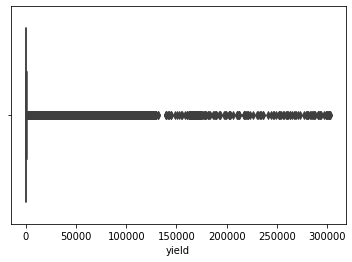

In [258]:
sns.boxplot(trainy)

In [3]:
import pickle
import pandas as pd
temptrain = pd.read_pickle("temptrain_dup_rem_b4_mod5.pickle")
tempval = pd.read_pickle("tempval_dup_rem_b4_mod5.pickle")
temptest2 = pd.read_pickle("temptest2_dup_rem_b4_mod5.pickle")
validationy = pd.read_pickle("validationy_dup_rem_b4_mod5.pickle")
trainy = pd.read_pickle("trainy_dup_rem_b4_mod5.pickle") 
#ids_test = pd.read_pickle("ids_test_dup_rem_b4_mod5.pickle")


In [266]:
temptrain.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,day_name_2,day_name_3,day_name_4,day_name_5,day_name_6,day_name_7,time_of_day_1,time_of_day_2,time_of_day_3,time_of_day_4
0,1434,4,1385,16,16,852,1202,783,133,316,...,0,0,0,0,0,1,0,0,0,0
1,142,0,1116,8,12,594,1061,636,40,31,...,0,0,0,0,0,0,0,0,1,0
2,142,0,1116,8,12,565,0,636,40,32,...,0,0,0,0,0,0,0,0,1,0
3,142,0,1116,8,12,541,0,631,40,32,...,0,0,0,0,0,0,0,1,0,0
4,142,0,1116,8,12,527,759,620,40,31,...,0,0,0,0,0,0,0,0,1,0


In [265]:
print(temptrain.shape)
print(tempval.shape)
print(temptest2.shape)

(18823465, 33)
(8784128, 33)
(20848800, 28)


In [267]:
temptest2.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,is_month_start_1,day_name_1,day_name_2,day_name_3,day_name_4,day_name_5,day_name_6,time_of_day_1,time_of_day_2,time_of_day_3
0,142,0,1116,8,12,442,4,428,43,30,...,1,0,0,1,0,0,0,0,0,1
1,142,0,1116,8,12,442,185,447,44,30,...,1,0,0,1,0,0,0,0,0,1
2,142,0,1116,8,12,418,234,447,44,30,...,1,0,0,1,0,0,0,0,0,1
3,142,0,1116,8,12,434,234,454,44,30,...,1,0,0,1,0,0,0,0,0,1
4,142,0,1116,8,12,427,185,454,45,30,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
#import seaborn as sns
#corr = temptrain.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [4]:
tempval.drop(['day_name_7','time_of_day_4','is_month_end_2', 'is_month_start_2','weekday_name'],axis=1,inplace = True)
temptrain.drop(['day_name_7','time_of_day_4', 'is_month_end_2', 'is_month_start_2','weekday_name'],axis=1,inplace = True)


In [270]:
print(tempval.shape)
print(temptrain.shape)
print(temptest2.shape)

(8784128, 28)
(18823465, 28)
(20848800, 28)


In [ ]:
#Models

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
# Non linear models regression metrics
def regression_error_metrics(trainy, trainy_pred, testy, testy_pred):

    mse_train = mean_squared_error(trainy, trainy_pred)
    mse_test = mean_squared_error(validationy, testy_pred)

    rmse_train = np.sqrt(mean_squared_error(trainy, trainy_pred))
    rmse_test = np.sqrt(mean_squared_error(validationy, testy_pred))

    mae_train = mean_absolute_error(trainy, trainy_pred)
    mae_test = mean_absolute_error(validationy, testy_pred)

    # printing values


    print('mean squared error for train: ', mse_train)
    print('mean squared error for validation: ', mse_test)
    print('root mean squared error for train: ', rmse_train)
    print('root mean squared error validation: ', rmse_test)
    print('mean absolute error for train: ', mae_train)
    print('mean absolute error for validation: ', mae_test)
    print('mean absolute percentage error for train: ', mean_absolute_percentage_error(trainy, trainy_pred))
    print('mean absolute percentage error for validation: ', mean_absolute_percentage_error(validationy, testy_pred))
    

In [ ]:
temptrain.columns

In [ ]:
temptest2.columns

In [ ]:
tempval.columns

In [ ]:
#temptrain.drop(['day_name_1', 'day_name_2', 'quarter', 'day_name_3', 'day_name_4','precipitation','day_name_5','is_month_start_1','day_name_6'],axis =1,inplace =True)
#tempval.drop(['day_name_1', 'day_name_2', 'quarter', 'day_name_3', 'day_name_4','precipitation','day_name_5','is_month_start_1','day_name_6'],axis =1,inplace =True)
#temptest2.drop(['day_name_1', 'day_name_2', 'quarter', 'day_name_3', 'day_name_4','precipitation','day_name_5','is_month_start_1','day_name_6'],axis =1,inplace =True)


In [6]:
reg = LinearRegression()

In [8]:
temptrain = temptrain[0:15057314]
tempval = tempval[0:5019105]


In [12]:
#Fit the data(train the model)
model= reg.fit(temptrain, trainy)
# Predict
y_pred = model.predict(temptrain)
y_pred_test = model.predict(tempval)
# model evaluation
mse = mean_squared_error(trainy, y_pred)
rmse_train = np.sqrt(mean_squared_error(trainy, y_pred))
rmse_test = np.sqrt(mean_squared_error(validationy, y_pred_test))
mae = mean_absolute_error(trainy, y_pred)


r2 =model.score(temptrain, trainy)
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('mean squared error: ', mse)
print('root mean squared error train: ', rmse_train)
print('root mean squared error test: ', rmse_test)
print('mean absolute error: ', mae)
print('mean absolute percentage error for train: ', mean_absolute_percentage_error(trainy, y_pred))
print('mean absolute percentage error for test: ', mean_absolute_percentage_error(validationy, y_pred_test))

print('R2 score: ', r2)

Slope: [-7.55916307e-04 -1.77745429e-01  2.00164376e-04 -2.00476621e-01
 -2.62082818e-02  2.55167938e-03  2.25684547e-03 -4.70129152e-03
  1.09904970e-02  1.80197434e-02 -5.42123621e-03 -1.55184040e-01
 -1.46545233e-02 -1.50951578e-01  4.34722441e-01  2.39625538e-02
 -3.91074748e+01  6.28139861e+00 -4.13708846e+00 -5.14572199e+00
 -5.05108086e+00 -4.58629546e+00 -3.54234291e+00 -3.07732076e+00
 -3.63852046e-01 -2.72793613e+01 -9.04176802e+00 -7.32505952e+01]
Intercept: 498.03901226366344
mean squared error:  5663965.132143057
root mean squared error train:  2379.908639453006
root mean squared error test:  2406.0053770609707
mean absolute error:  573.684734940103


C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


mean absolute percentage error for train:  inf
mean absolute percentage error for test:  inf
R2 score:  0.00023517873792444635


In [13]:
y_pred_test_main = model.predict(temptest2)

In [ ]:
#You tree will give more "importance" to the datapoints that are duplicated because the loss function will double count the error from those datapoints.

# If every single datapoint was duplicated, then the resulting decision tree would not be any different. What is important is the ratio of duplicated datapoints to the number of non-duplicated dataponts, not the size of the dataset itself. (Except if you consider running time...)

# Sometimes "duplicate" datapoints are legitimate, and those should not be thrown away.

In [ ]:
# The parameters for decision trees are often based on record counts -- minimum leaf size and minimum split search size come to mind. In addition, purity measures are affected by the size of nodes as the tree is being built. When you have duplicated records, then you are implicitly putting a weight on the values in those rows.

# This is neither good nor bad. You simply need to understand the data and the model that you want to build. If the duplicated values arise from different runs of an experiment, then they should be fine.

# In some cases, duplicates (or equivalently weights) can be quite bad. For instance, if you are oversampling the data to get a balanced sample on the target, then the additional rows would be problematic. A single leaf might end up consisting of a single instance from the original data -- and overfitting would be a problem.

In [ ]:
#Decision Tree 

In [9]:
dt_reg=tree.DecisionTreeRegressor()
dt_reg.fit(temptrain,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:
pred_train_reg = dt_reg.predict(temptrain)

In [11]:
pred_test_reg = dt_reg.predict(tempval)

In [12]:
pred_test_data_reg = dt_reg.predict(temptest2)

In [13]:
regression_error_metrics(trainy, pred_train_reg, validationy, pred_test_reg)

mean squared error for train:  1415713.4806902749
mean squared error for validation:  7902171.526440854
root mean squared error for train:  1189.8375858453435
root mean squared error validation:  2811.080135186625
mean absolute error for train:  143.86279821314398
mean absolute error for validation:  641.2978784826779


C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  nan


In [ ]:
# Learning curves for noraml Decision Tree

In [14]:
from mlxtend.plotting import plot_learning_curves

In [ ]:
trainy.shape

([145.67097286382102,
  145.22690933792123,
  145.62273074432832,
  144.81306004655778,
  144.6382176677176,
  144.62583770635578,
  144.34088010792152,
  143.98962691770774,
  144.04922594544587,
  143.8627982131124],
 [1250.1099084471105,
  655.3567235035655,
  627.4219491152187,
  660.2652220076241,
  640.9364698100298,
  641.1902785629707,
  644.0499700383687,
  637.4577439240071,
  642.9302985053552,
  641.1707505662902])

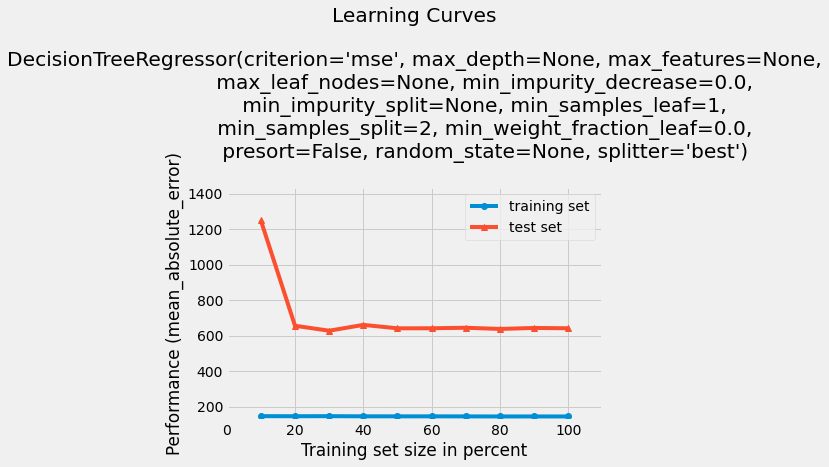

In [15]:
plot_learning_curves(temptrain, trainy, tempval, validationy, dt_reg, scoring='mean_absolute_error')

In [ ]:
#Decision Tree with hyperparameter

In [16]:
dt_reg_hp=tree.DecisionTreeRegressor(min_samples_split = 100)
dt_reg_hp.fit(temptrain,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
pred_train_dt_reg_hp = dt_reg_hp.predict(temptrain)

In [18]:
pred_test_dt_reg_hp = dt_reg_hp.predict(tempval)

In [19]:
pred_test_main_dt_reg_hp = dt_reg_hp.predict(temptest2)

In [20]:
regression_error_metrics(trainy, pred_train_dt_reg_hp, validationy, pred_test_dt_reg_hp)

mean squared error for train:  5348551.552265162
mean squared error for validation:  5918989.492931039
root mean squared error for train:  2312.693570766599
root mean squared error validation:  2432.8973453335507
mean absolute error for train:  563.3067030564814
mean absolute error for validation:  590.9931833981524


C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


mean absolute percentage error for train:  inf
mean absolute percentage error for validation:  inf


In [ ]:
#Learning curves for Decision Tree with hp

([563.7411806235004,
  565.9409569297925,
  567.0941868413134,
  566.1783370668853,
  565.0290936961621,
  564.6236896656948,
  564.1960648133045,
  564.6401704979722,
  563.9312635749,
  563.3067030564812],
 [728.7402616134004,
  589.0429807915664,
  593.2042738352952,
  578.1714591193655,
  590.2708902347524,
  590.8819219688838,
  592.5050674466337,
  591.432531076746,
  592.3181521912534,
  590.9848202328252])

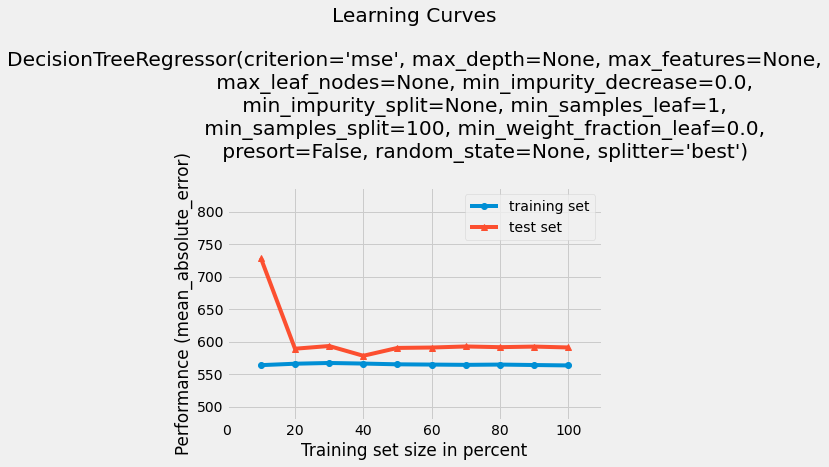

In [21]:
plot_learning_curves(temptrain, trainy, tempval, validationy, dt_reg_hp, scoring='mean_absolute_error')

In [ ]:
#Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
#rf_grid = RandomForestRegressor(n_jobs=-1)
rf = RandomForestRegressor(min_samples_split = 100,n_jobs=-1)
rf.fit(X =temptrain ,y = trainy)

C:\Users\Vishnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [25]:
y_train_pred_rf = rf.predict(temptrain)
y_test_pred_rf = rf.predict(tempval)

In [26]:
y_test_main_pred_rf = rf.predict(temptest2)

In [27]:
regression_error_metrics(trainy, y_train_pred_rf, validationy, y_test_pred_rf)

mean squared error for train:  5314819.1795634935
mean squared error for validation:  5812902.98563557
root mean squared error for train:  2305.389160112343
root mean squared error validation:  2410.9962641272527
mean absolute error for train:  558.6791473841952
mean absolute error for validation:  587.8301505747415


C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


mean absolute percentage error for train:  inf
mean absolute percentage error for validation:  inf


In [ ]:
# 3. Sourcing Strategy for ing_w per month

In [ ]:
temptest2.tail()

In [28]:
y_test_main_pred_rf[-5:]

array([1921.07944092, 1921.07944092, 1007.53238867, 1955.02565885,
       1955.02565885])

In [29]:
testwithtarget = pd.concat([temptest2, pd.DataFrame(y_test_main_pred_rf,columns=['predyield'])],axis =1 )

In [30]:
testwithtarget.shape

(20848800, 29)

In [31]:
testwithtarget.columns

Index(['farm_id', 'ingredient_type', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed', 'dayofyear', 'day',
       'month', 'quarter', 'hour', 'weekend_or_not_test', 'is_month_end_1',
       'is_month_start_1', 'day_name_1', 'day_name_2', 'day_name_3',
       'day_name_4', 'day_name_5', 'day_name_6', 'time_of_day_1',
       'time_of_day_2', 'time_of_day_3', 'predyield'],
      dtype='object')

In [32]:
testwithtarget.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,...,day_name_1,day_name_2,day_name_3,day_name_4,day_name_5,day_name_6,time_of_day_1,time_of_day_2,time_of_day_3,predyield
0,142,0,1116,8,12,442,4,428,43,30,...,0,0,1,0,0,0,0,0,1,389.521659
1,142,0,1116,8,12,442,185,447,44,30,...,0,0,1,0,0,0,0,0,1,307.861507
2,142,0,1116,8,12,418,234,447,44,30,...,0,0,1,0,0,0,0,0,1,223.761331
3,142,0,1116,8,12,434,234,454,44,30,...,0,0,1,0,0,0,0,0,1,263.254444
4,142,0,1116,8,12,427,185,454,45,30,...,0,0,1,0,0,0,0,0,1,324.960534


In [35]:
final_train_merged['month'] = final_train_merged['date'].dt.month

In [36]:
final_train_merged[final_train_merged['ingredient_type']=='ing_w'].groupby(['month'])['yield'].sum()

month
1     152382096.0
2     140397792.0
3     141609840.0
4     147248448.0
5     161806080.0
6     182349376.0
7     192081840.0
8     196522640.0
9     192687408.0
10    178265264.0
11    177691264.0
12    176790592.0
Name: yield, dtype: float32

In [37]:
testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()

month
0     1.010732e+09
1     8.811175e+08
2     9.294245e+08
3     1.058250e+09
4     9.045764e+08
5     1.000231e+09
6     8.558854e+08
7     8.628381e+08
8     7.531749e+08
9     7.677009e+08
10    7.903905e+08
11    7.946022e+08
Name: predyield, dtype: float64

In [38]:
twt = testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()

In [39]:
twt.shape

(12,)

In [40]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline

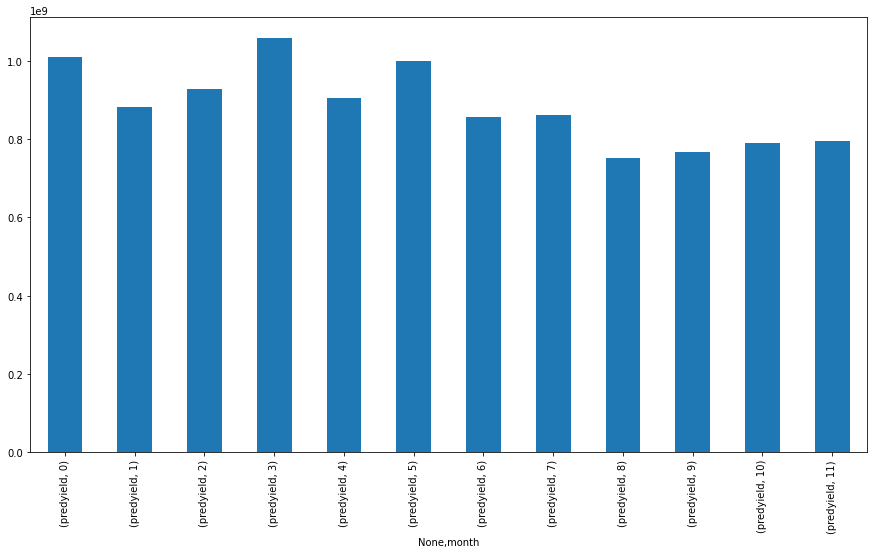

In [41]:
pd.DataFrame(testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()).unstack().plot(kind = 'bar',figsize=(15,8))

In [ ]:
Original Demand given:
    
# 1 90430481
# 2 75344853
# 3 91917783
# 4 82591524
# 5 87419669
# 6 297500000
# 7 198900000
# 8 97367031
# 9 91049286
# 10 91755300
# 11 86533266
# 12 88514610

In [42]:
org_demand = [90430481, 75344853, 91917783, 82591524,87419669, 297500000, 198900000, 97367031, 91049286, 91755300, 86533266, 88514610]

In [43]:
ddf = twt - org_demand

In [44]:
ddf

month
0     9.203011e+08
1     8.057726e+08
2     8.375067e+08
3     9.756587e+08
4     8.171567e+08
5     7.027312e+08
6     6.569854e+08
7     7.654711e+08
8     6.621256e+08
9     6.759456e+08
10    7.038572e+08
11    7.060876e+08
Name: predyield, dtype: float64

In [45]:
twtlist = [ 1.010732e+09,
      8.811175e+08,
      9.294245e+08,
      1.058250e+09,
      9.045764e+08,
      1.000231e+09,
      8.558854e+08,
      8.628381e+08,
      7.531749e+08,
      7.677009e+08,
      7.903905e+08,
      7.946022e+08]
org_demandlist = [90430481, 
              75344853, 
              91917783,
              82591524,
              87419669,
              297500000, 
              198900000, 
              97367031, 
              91049286, 
              91755300, 
              86533266,
              88514610]


In [46]:
extra  =  twtlist[0] - org_demandlist[1]
print("Extra produce after meeting 2nd month's demand : ",extra)
extra2 = extra + twtlist[1] 
extra = extra2 -  org_demandlist[2]
print("Extra produce after meeting 3rd month's demand : ",extra)
extra2 = extra + twtlist[2] 
extra = extra2 -  org_demandlist[3]
print("Extra produce after meeting 4th month's demand : ",extra)
extra2 = extra + twtlist[3] 
extra = extra2 -  org_demandlist[4]
print("Extra produce after meeting 5th month's demand : ",extra)
extra2 = extra + twtlist[4] 
extra = extra2 -  org_demandlist[5]
print("Extra produce after meeting 6th month's demand : ",extra)
extra2 = extra + twtlist[5] 
extra = extra2 -  org_demandlist[6]
print("Extra produce after meeting 7th month's demand : ",extra)
extra2 = extra + twtlist[6] 
extra = extra2 -  org_demandlist[7]
print("Extra produce after meeting 8th month's demand : ",extra)
extra2 = extra + twtlist[7] 
extra = extra2 -  org_demandlist[8]
print("Extra produce after meeting 9th month's demand : ",extra)
extra2 = extra + twtlist[8] 
extra = extra2 -  org_demandlist[9]
print("Extra produce after meeting 10th month's demand : ",extra)
extra2 = extra + twtlist[9] 
extra = extra2 -  org_demandlist[10]
print("Extra produce after meeting 11th month's demand : ",extra)
extra2 = extra + twtlist[10] 
extra = extra2 -  org_demandlist[11]
print("Extra produce after meeting 12th month's demand : ",extra)
extra2 = extra + twtlist[11] 
print("Extra produce remaing after year end : ",extra2)

Extra produce after meeting 2nd month's demand :  935387147.0
Extra produce after meeting 3rd month's demand :  1724586864.0
Extra produce after meeting 4th month's demand :  2571419840.0
Extra produce after meeting 5th month's demand :  3542250171.0
Extra produce after meeting 6th month's demand :  4149326571.0
Extra produce after meeting 7th month's demand :  4950657571.0
Extra produce after meeting 8th month's demand :  5709175940.0
Extra produce after meeting 9th month's demand :  6480964754.0
Extra produce after meeting 10th month's demand :  7142384354.0
Extra produce after meeting 11th month's demand :  7823551988.0
Extra produce after meeting 12th month's demand :  8525427878.0
Extra produce remaing after year end :  9320030078.0


In [47]:
extra2

9320030078.0

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_jobs=-1)

In [ ]:
temptrain.dtypes

In [ ]:
#label encoding the categorical columns
from sklearn import preprocessing 
  
label_encoder6 = preprocessing.LabelEncoder() 
label_encoder7 = preprocessing.LabelEncoder() 

label_encoder10 = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column target. 

label_encoder6.fit(temptrain["dayofyear"])
label_encoder7.fit(tempval["day"])
label_encoder10.fit(temptest2["hour"])

In [ ]:
temptrain['dayofyear'] = label_encoder6.transform(temptrain["dayofyear"]) 
temptrain['day'] = label_encoder7.transform(temptrain["day"]) 
#temptrain['hour'] = label_encoder10.transform(temptrain["hour"])

In [ ]:
tempval['dayofyear'] = label_encoder6.transform(tempval["dayofyear"]) 
tempval['day'] = label_encoder7.transform(tempval["day"]) 
#tempval['hour'] = label_encoder10.transform(tempval["hour"])

In [ ]:
temptest2['dayofyear'] = label_encoder6.transform(temptest2["dayofyear"]) 
temptest2['day'] = label_encoder7.transform(temptest2["day"]) 
#temptest2['hour'] = label_encoder10.transform(temptest2["hour"])

In [ ]:
#from xgboost import XGBRegressor
xgb = XGBRegressor

In [61]:
#%%time
xgb.fit(X=temptrain, y=trainy)

[23:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:35:33] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
temptrain = np.asmatrix(temptrain)
temptest2 = np.asmatrix(temptest2)
tempval = np.asmatrix(tempval)


In [ ]:
temptest2.columns

In [ ]:
tempval.columns

In [ ]:
temptrain.columns

In [ ]:
temptrain.rename({'weekend_or_not_train': 'weekend_or_not'}, axis=1, inplace = True)

In [ ]:
tempval.rename({'weekend_or_not_validation': 'weekend_or_not'}, axis=1, inplace = True)

In [ ]:
temptest2.rename({'weekend_or_not_test': 'weekend_or_not'}, axis=1, inplace = True)

In [62]:
#Obtain the predictions

y_train_pred_xgb = xgb.predict(temptrain)
y_test_pred_xgb = xgb.predict(tempval)

In [63]:
y_test_main_pred_xgb = xgb.predict(temptest2)

In [69]:
regression_error_metrics(trainy, y_train_pred_xgb ,validationy,y_test_pred_xgb)

mean squared error for train:  5663671.5
mean squared error for validation:  5788779.0
root mean squared error for train:  2379.847
root mean squared error validation:  2405.988
mean absolute error for train:  573.64453
mean absolute error for validation:  575.912
mean absolute percentage error for train:  inf
mean absolute percentage error for validation:  inf


/Users/nithinsai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Decision Tree without Removing Outliers

In [91]:
dt_reg_split =tree.DecisionTreeRegressor(min_samples_split = 100)
dt_reg_split.fit(temptrain,trainy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [92]:
pred_train_reg_split = dt_reg_split.predict(temptrain)
pred_test_reg_split = dt_reg_split.predict(tempval)

In [94]:
regression_error_metrics(trainy, pred_train_reg_split, validationy, pred_test_reg_split)


mean squared error for train:  5359033.891520397
mean squared error for validation:  5919168.046002611
root mean squared error for train:  2314.9587235025156
root mean squared error validation:  2432.934040618983
mean absolute error for train:  564.4652748095465
mean absolute error for validation:  590.3048957335626
mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  inf


/Users/nithinsai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nithinsai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
conda install -c conda-forge keras

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Vishnu\Anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.9.0              |   py37hc8dfbb8_1         162 KB  conda-forge
    astor-0.7.1                |             py_0          22 KB  conda-forge
    blinker-1.4                |             py_1          13 KB  conda-forge
    cachetools-3.1.1           |             py_0          11 KB  conda-forge
    gast-0.2.2                 |             py_0          10 KB  conda-forge
    google-auth-1.14.2         |     pyh9f0ad1d_0          54 KB  conda-forge
    google-auth-oauthlib-0.4.1 |             py_2          18 KB  conda-forge
    google-pasta-0.2.0         |     pyh8c360ce_0          42 KB  conda-forge
    grpcio-1.27.

In [9]:
# Neural Network

import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [10]:
## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

In [103]:
temptrain.shape

(15057314, 27)

In [11]:
## Adding one layer having only one neuron
## Notice our data has 28 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(10, input_dim=28))
model.add(Dense(12, activation= "relu"))
model.add(Dense(1, activation='linear', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])

In [101]:
model

In [12]:
## Training neural nets
history = model.fit(temptrain, trainy, validation_data=(tempval,validationy), epochs=50, batch_size=100000, callbacks=[reduce_lr, earlystopper])

Train on 15057314 samples, validate on 5019105 samples
Epoch 1/50
15057314/15057314 [==============================] - 34s 2us/step - loss: 5678735.0940 - mean_squared_error: 5678735.0000 - val_loss: 5791292.2723 - val_mean_squared_error: 5791291.5000
Epoch 2/50
15057314/15057314 [==============================] - 34s 2us/step - loss: 5668831.9155 - mean_squared_error: 5668832.0000 - val_loss: 5791369.5427 - val_mean_squared_error: 5791370.0000
Epoch 3/50
15057314/15057314 [==============================] - 33s 2us/step - loss: 5668200.9143 - mean_squared_error: 5668202.5000 - val_loss: 5790968.7373 - val_mean_squared_error: 5790966.5000
Epoch 4/50
15057314/15057314 [==============================] - 34s 2us/step - loss: 5668033.0460 - mean_squared_error: 5668033.0000 - val_loss: 5790745.6548 - val_mean_squared_error: 5790745.0000
Epoch 5/50
15057314/15057314 [==============================] - 34s 2us/step - loss: 5667677.9825 - mean_squared_error: 5667678.0000 - val_loss: 5790692.7460

In [13]:
model.add(Dense(10, input_dim=28))
model.add(Dense(12, activation= "relu"))
model.add(Dense(1, activation='linear', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [15]:
## Training neural nets
history = model.fit(temptrain, trainy, validation_data=(tempval,validationy), epochs=10, batch_size=100000, callbacks=[reduce_lr, earlystopper])

Train on 15057314 samples, validate on 5019105 samples
Epoch 1/10
15057314/15057314 [==============================] - 33s 2us/step - loss: 422.7862 - mean_absolute_error: 422.7438 - val_loss: 423.4386 - val_mean_absolute_error: 423.3961
Epoch 2/10
15057314/15057314 [==============================] - 35s 2us/step - loss: 422.4849 - mean_absolute_error: 422.4425 - val_loss: 423.0878 - val_mean_absolute_error: 423.0453
Epoch 3/10
15057314/15057314 [==============================] - 35s 2us/step - loss: 422.2002 - mean_absolute_error: 422.1577 - val_loss: 422.7592 - val_mean_absolute_error: 422.7169
Epoch 4/10
15057314/15057314 [==============================] - 35s 2us/step - loss: 421.9302 - mean_absolute_error: 421.8878 - val_loss: 422.4506 - val_mean_absolute_error: 422.4082
Epoch 5/10
15057314/15057314 [==============================] - 35s 2us/step - loss: 421.6734 - mean_absolute_error: 421.6310 - val_loss: 422.1598 - val_mean_absolute_error: 422.1175
Epoch 6/10
15057314/15057314 [

In [80]:
train_acc = history.history['mean_absolute_error']
train_loss = history.history['loss']

val_acc = history.history['val_mean_squared_error']
val_loss = history.history['val_loss']

from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

NameError: name 'history' is not defined

In [ ]:
#The error outputs of all the models

In [3]:
conda install -c conda-forge tabletext

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - tabletext

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
pip install tabletext

  Using cached https://files.pythonhosted.org/packages/ed/53/4152a8c71531d4b09eb34cfd7cd18f3764a988de4dc9039405f8182dddb7/tabletext-0.1.tar.gz
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Vishnu\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Vishnu\\AppData\\Local\\Temp\\pip-install-1r75vw24\\tabletext\\setup.py'"'"'; __file__='"'"'C:\\Users\\Vishnu\\AppData\\Local\\Temp\\pip-install-1r75vw24\\tabletext\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\Vishnu\AppData\Local\Temp\pip-install-1r75vw24\tabletext\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Vishnu\AppData\Local\Temp\pip-install-1r75vw24\tabletext\setup.py", line 10, in <module>
        + open("CHANGELOG.rst").read(),
      File "C:\Users\Vishnu\Anaconda3\lib\encodings\cp1252.py", line 23, in decode
        return codecs.charm

In [4]:
import tabletext

data = [["","Linear Regression","Decision Tree with Outliers","Decision Tree without Outliers"],
        ["Train",2277.80,40186.28,9.49],
        ["Validation",2302.14,41281.63,887.70],
        ["Test","NA","NA","NA"]
        ]

print (tabletext.to_text(data))


ModuleNotFoundError: No module named 'tabletext'

In [53]:
import texttable
table = Texttable()

table.add_rows([["","Linear Regression","Decision Tree with Outliers","Decision Tree without Outliers"],
        ["Train (mae)",573.80,143.86,564]
        ])    

NameError: name 'Texttable' is not defined

In [ ]:
print table.draw() + "\n"

In [ ]:
data = [["Decision Tree with Hyperparameter","XG Boost","Neural Network"],
        ["Train(mae)",574.37,573,420.887]
        ]

print (texttable.to_text(data))

In [17]:
help(texttable)

Help on module texttable:

NAME
    texttable - module for creating simple ASCII tables

DESCRIPTION
    
    Example:
    
        table = Texttable()
        table.set_cols_align(["l", "r", "c"])
        table.set_cols_valign(["t", "m", "b"])
        table.add_rows([["Name", "Age", "Nickname"],
                        ["Mr\nXavier\nHuon", 32, "Xav'"],
                        ["Mr\nBaptiste\nClement", 1, "Baby"],
                        ["Mme\nLouise\nBourgeau", 28, "Lou\n\nLoue"]])
        print table.draw() + "\n"
    
        table = Texttable()
        table.set_deco(Texttable.HEADER)
        table.set_cols_dtype(['t',  # text
                              'f',  # float (decimal)
                              'e',  # float (exponent)
                              'i',  # integer
                              'a']) # automatic
        table.set_cols_align(["l", "r", "r", "r", "l"])
        table.add_rows([["text",    "float", "exp", "int", "auto"],
                        ["abcd", 